# 2. Indikatorių programavimas

Manipuliuojama duomenimis sudėtingesniais metodais ir suprogramuojami žinomi duomenų analizės algoritmai / indikatoriai.

**Darbą atliko:** Evelina Vaitkevičiūtė, DM 3k. 1gr.


**Data:** 2024-03-27

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Bibliotekos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Duomenys

In [ ]:
# Duomenų nuskaitymas

def read_data(file_name, notebook_path='/content/gdrive/MyDrive/Finansinis_intelektas/', header=None, limit=None, parse_dates=['Date']):
    file_path = notebook_path + file_name
    df = pd.read_csv(file_path, header=header, nrows=limit, parse_dates=parse_dates)
    df = df.set_index('Date')
    print(df.dtypes)
    return df

# AAPL duomenys
data = read_data('AAPL.csv', header=0)
print(data)

# EURUSD duomenys
data2 = read_data('EURUSD=X.csv', header=0)
print(data2)

# TESLA duomenys
data3 = read_data('TSLA.csv', header=0)
print(data3)


# def read_data(data_path):
#     df = pd.read_csv(data_path, parse_dates=['Date'])
#     df = df.set_index(pd.DatetimeIndex(df['Date'].values))  # Nustatoma 'Date' kaip indeksas
#     print(df.dtypes)
#     return df

# data1 = read_data('/content/gdrive/MyDrive/Finansinis_intelektas/EURUSD=X.csv')
# data1

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-17  176.649994  178.419998  174.800003  177.149994  176.691452   
2023-10-18  175.580002  177.580002  175.110001  175.839996  175.384842   
2023-10-19  176.039993  177.839996  175.190002  175.460007  175.005844   
2023-10-20  175.309998  175.419998  172.639999  172.880005  172.432510   
2023-10-23  170.910004  174.009995  169.929993  173.000000  172.552200   
...                ...         ...         ...         ...         ...   
2024-03-11  172.940002  174.380005  172.050003  172.750000  172.750000   
2024-03-12  173.149994  174.029999  171.009995  173.229996  173.229996   
2024-03-13  172.770004  173.190002  170.759995  171.130005  171.130005   
2024-03-14  172.910004  174.309998  172.050003

Dalis A – indikatoriai *Yahoo Finance* ir *TradingView* platformoje (MetaTrader yra tik Forex duomenys - nėra AAPL ir TESLA duomenų, o MFI indikatoriui suprogramuoti duomenys iš Forex netinka)

Dalis B – indikatorių programavimas *Python*


# Chaikin Volatility (CV) (kintamumo indikatorius)

*Chaikin Volatility* skirtas apskaičiuoti rinkos kintamumo rodiklius ir galimą riziką;

kintamumo indikatorius apskaičiuoja didžiausios ir mažiausios kainos skirtumą dalijant šią vertę iš didžiausios ir mažiausios kainos per tą patį laikotarpį vidurkio.

**Interpretacija**

**Kai reikšmės, mažesnės už 0, rodo mažesnį kintamumą, o didesnės už 0 - didesnį kintamumą.**

Kai kintamumas yra **didelis**, rinkoje vyksta dideli kainų svyravimai ir didėja prekybos aktyvumas **(daugiau rizikos, galimybių pelnui)**

**Mažas** kintamumas gali reikšti artėjantį kainų pokytį. Prekybos galimybės yra sumažėjusios. Tokiais laikotarpiais patartina apsvarstyti galimybę prieš sudarant sandorius ir palaukti didesnio kintamumo **(mažiau rizikos, mažiau pelno)**.

**Divergavimas:**
Kai kainos grafikas juda viena kryptimi, o CV indikatoriaus linija juda priešinga kryptimi -> tai gali reikšti, kad rinkoje tikėtinas tendencijos pasikeitimas, suteikiantis investuotojams galimybę įeiti į rinką arba išeiti iš jos.

Jei CV didėja krentant kainoms -> didesnis rinkos nestabilumas ir galimybė kritimui -> PARDUOTI

Jei CV didėja kylant kainoms -> didesnis potencialas kainų augimui -> PIRKTI

**Formulė**

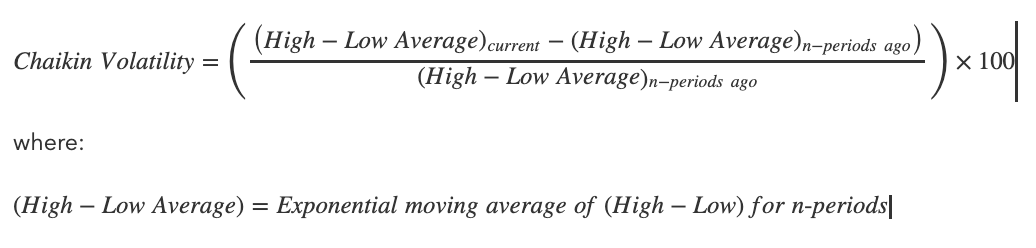

EMA - exponential moving average.  Slenkamasis vidurkis išlygina kintamumo vertes laikui bėgant, todėl aiškiau matyti bendra tendencija.

In [ ]:
# Funkcija, skirta apskaiciuoti eksponentini slenkamaji vidurki (Exponential Moving Average)

def ema_custom(data, window): # data - duomenys; window - laikotarpis
    smoothing_factor = 2 / (window + 1)  # islyginamoji konstanta (smoothing factor), kurios verte nuo 0 iki 1
    ema_values = [data.iloc[0]]  # Pradiniai duomenys
    for i in range(1, len(data)): # einama per visus duomenis, pradedant nuo antrosios reiksmes
        ema_values.append(data.iloc[1] * smoothing_factor + ema_values[i - 1] * (1 - smoothing_factor)) # ema formule
    return ema_values

# Kitas budas:

# def ema_custom(data, window): # data - duomenys; window - laikotarpis
#     smoothing_factor = 2 / (window + 1) # islyginamoji konstanta (smoothing factor), kurios verte nuo 0 iki 1
#     # nustato, kokia itaka naujai skaiciuojamai EMA reiksmei turi dabartiniai duomenys
#     ema_values = [data[0]]  # pirmoji duomenu reiksme
#     for i in range(1, len(data)): # einama per visus duomenis, pradedant nuo antrosios reiksmes
#         ema = (data[i] - ema_values[-1]) * smoothing_factor + ema_values[-1] # skaiciuojama nauja EMA reiksme, atsizvelgiant i ankstesne EMA reiksme, islyginamaja konstanta
#         ema_values.append(ema) # sudedama i sarasa
#     return ema_values # grazinamas visu apskaiciuotu EMA reiksmiu sarasas


# Funkcija, skirta apskaiciuoti Chaikin Volatility kintamumo indikatoriu

def chaikin_volatility(df, window=14):
    high_low_ema = df['High'] - df['Low'] # skirtumas tarp auksciausiu ir zemiausiu kainu kiekvienam dabartiniam laikotarpiui
    ema_high_low = ema_custom(high_low_ema, window) # eksponentinio slenkamojo vidurkio (EMA) reiksme
    ema_high_low_shifted = pd.Series([None] * window + ema_high_low[:-window], index=df.index) # paslenkama per window laiko periodu
    chaikin_volatility = ((high_low_ema - ema_high_low_shifted) / ema_high_low_shifted) * 100 # Chaikin Volatility reiksmes, naudojant formule
    return chaikin_volatility


# Kitas budas:

# def chaikin_volatility(df, window=14):
#     high_low_ema = df['High'] - df['Low']  # skirtumas  tarp auksciausiu ir zemiausiu kainu kiekvienam laikotarpiui
#     ema_high_low = high_low_ema.ewm(span=window, adjust=False).mean() # eksponentinio slenkamojo vidurkio (EMA) reiksme
#     chaikin_volatility = ((high_low_ema - ema_high_low) / ema_high_low) * 100 # Chaikin Volatility reiksmes, naudojant formule

#     return chaikin_volatility

In [ ]:
# Funkcija vizualizavimui
def plot_stock_analysis(data, dates, indicator_values, period, label, indicator_name):

    # Funkcija, skirta pazymeti sritis nuo kiekvieno menesio 15 dienos iki kito menesio pirmos dienos
    def shade_month_ends(ax, data):
        for year_month, group in data.groupby([data.index.year, data.index.month]):
            year, month = year_month # metai ir menuo
            next_month_start = pd.Timestamp(year, month, 1) + pd.DateOffset(months=1) # pirmoji kito menesio diena
            # Pazymima sritis nuo einamojo menesio 15 dienos iki kito menesio pirmos dienos
            ax.axvspan(pd.Timestamp(year, month, 15), next_month_start, color='whitesmoke', alpha=0.5)

    plt.style.use("bmh") # nustatomas stilius "bmh"

    # Subplots (du grafikai) grafikai su koreguotais dydziais
    fig, axs = plt.subplots(2, 1, figsize=(16, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Abieju grafiku fono spalva
    axs[0].set_facecolor('white')
    axs[1].set_facecolor('white')

    # Pirmas grafikas - uždarymo (Close) kainos grafikas
    axs[0].plot(data.index, data['Close'], label=label, color='royalblue', linewidth=1)
    axs[0].set_ylabel('Price')
    axs[0].grid(True, alpha=0.5)  # sumazinamas permatomumas

    # Antras grafikas - vaizduojantis indikatoriu
    axs[1].plot(dates, indicator_values, label=f'{indicator_name} ({period}, 2, MA)', color='hotpink', linewidth=1)
    axs[1].set_title('')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel(indicator_name)
    axs[1].grid(True, alpha=0.5)  # sumazinamas permatomumas

    # Antrame grafike pridedama horizontali linija ties y=0
    axs[1].axhline(0, linestyle='--', color='grey', linewidth=1)

    # Pridedamas tekstas virsutiniame kairiajame kampe
    axs[0].text(0.02, 0.98, label, transform=axs[0].transAxes, va='top', ha='left')
    axs[1].text(0.02, 0.98, f'{indicator_name} ({period}, 2, MA)', transform=axs[1].transAxes, va='top', ha='left')

    # I kita grafiko puse perkeliama y asis
    axs[0].yaxis.set_label_position("right")
    axs[0].yaxis.tick_right()

    axs[1].yaxis.set_label_position("right")
    axs[1].yaxis.tick_right()

    last_price = data['Close'].iloc[-1] # paskutine pirmojo grafiko kainos reiksme

    y_ticks_fontsize = axs[0].yaxis.get_ticklabels()[0].get_fontsize() # y asies zymiu srifto dydis

    # Ant pirmojo grafiko y asies pazymima paskutine kainos verte
    axs[0].text(1.035, last_price, f'{last_price:.2f}', transform=axs[0].get_yaxis_transform(),
                ha='right', va='center', fontsize=y_ticks_fontsize, color='white',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.7))

    last_indicator_value = indicator_values.iloc[-1] # paskutine indikatoriaus reiksme

    # Ant antrojo grafiko y asies pazymima paskutine indikatoriaus verte
    axs[1].text(1.015, last_indicator_value, f'{last_indicator_value:.0f}', transform=axs[1].get_yaxis_transform(),
                ha='right', va='center', fontsize=y_ticks_fontsize, color='black',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='hotpink', alpha=0.6))

    fig.suptitle(f'{label} Stock Analysis ({indicator_name} Indicator)', fontsize=16, fontweight='bold') # bendras grafiku pavadinimas

    fig.tight_layout(rect=[0, 0, 1, 0.98])  # sumazinamas tarpas po pavadinimo

    # Nustatomos x asies ribos, kad jos prasidetu nuo pirmosios duomenu reiksmes
    axs[0].set_xlim(data.index[0], data.index[-1])
    axs[1].set_xlim(data.index[0], data.index[-1])

    # Pazymimos sritys
    shade_month_ends(axs[0], data)
    shade_month_ends(axs[1], data)

    # If plotting Mass Index, set y-axis limits for the second subplot
    # Jei braižomas Mass Index indikatorius, nustatomos y asies ribos antrajam grafikui
    if indicator_name == 'Mass Index':
        axs[1].set_ylim(22, 27)

    plt.show()

Date
2023-10-17          NaN
2023-10-18          NaN
2023-10-19          NaN
2023-10-20          NaN
2023-10-23          NaN
                ...    
2024-03-11    -5.668203
2024-03-12    22.267062
2024-03-13    -1.619369
2024-03-14    -8.502408
2024-03-15    -5.668103
Length: 104, dtype: float64


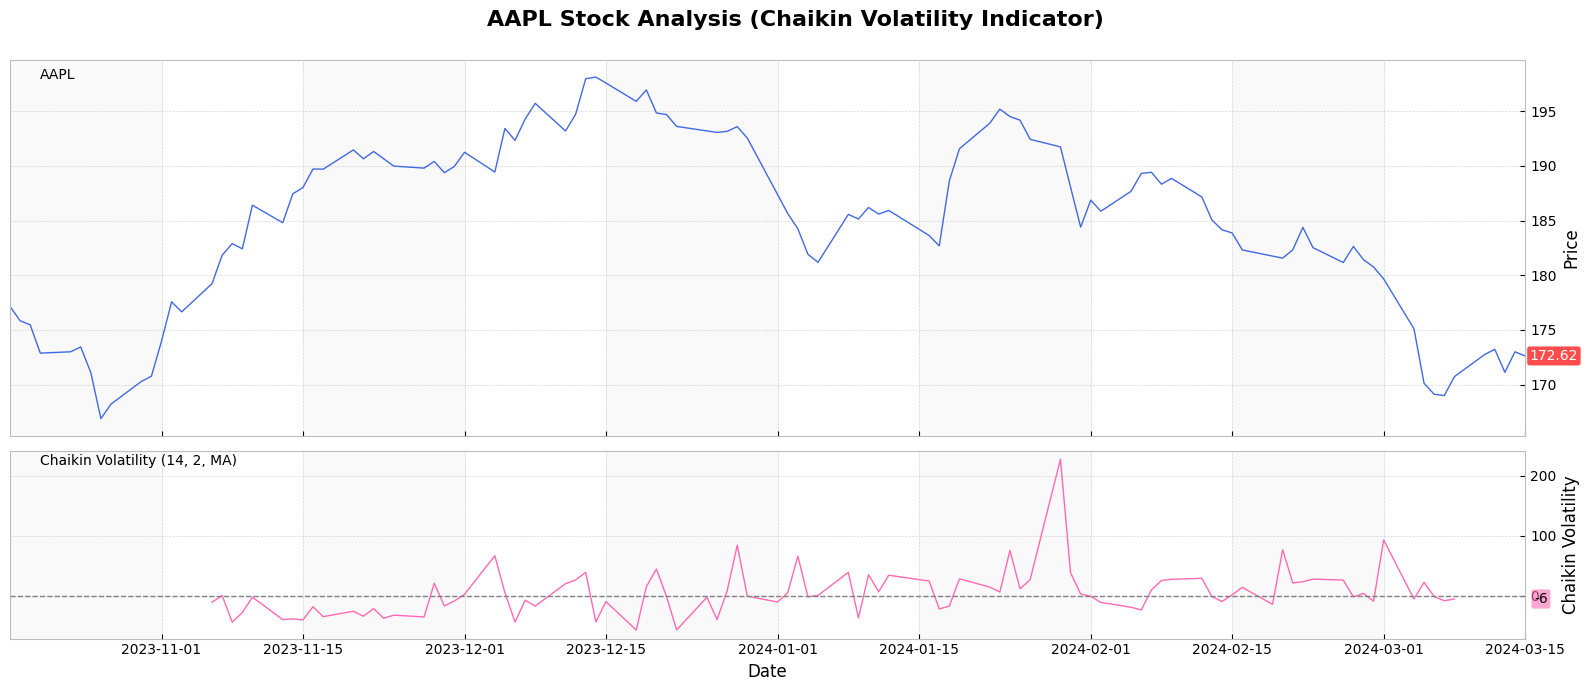

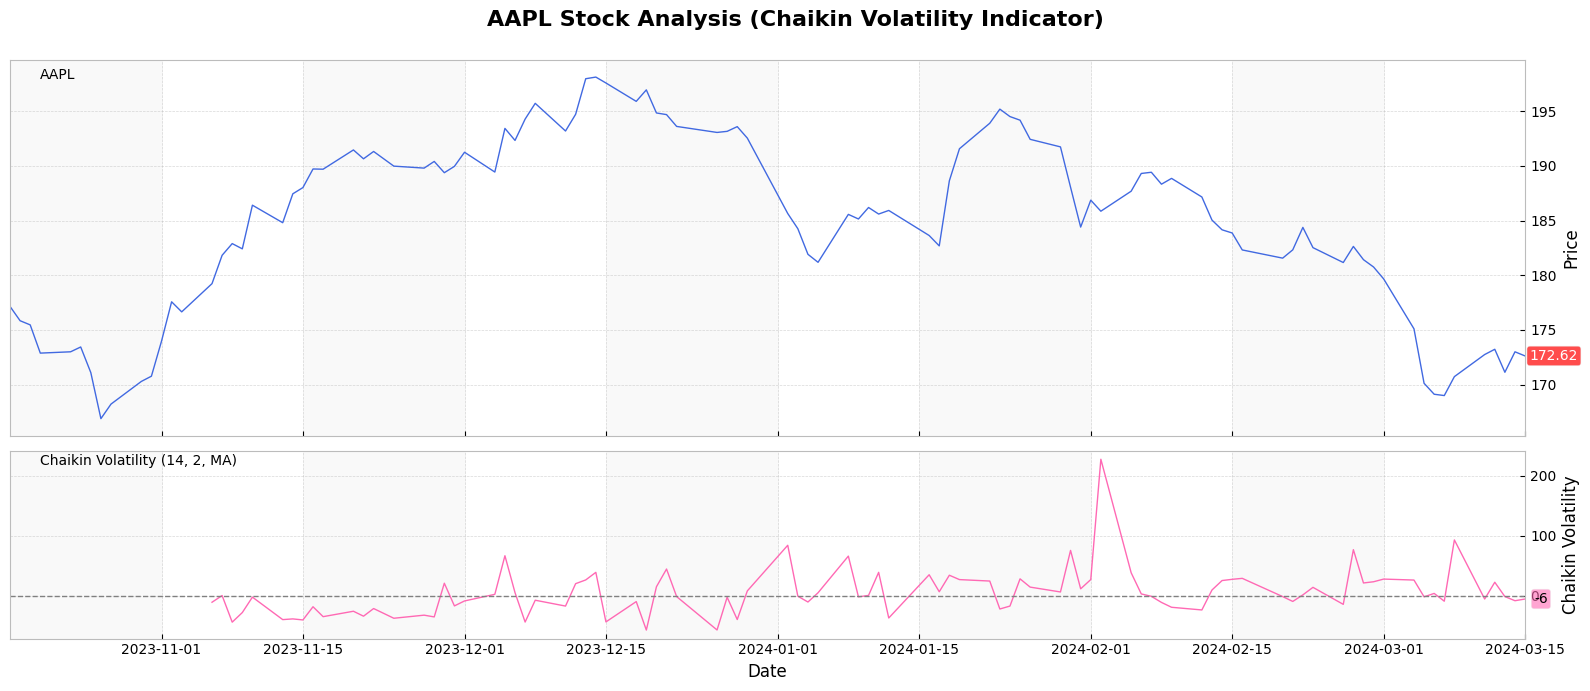

In [ ]:
# Skaiciuojama Chaikin Volatility Calculate indikatoriaus reiksmes (AAPL duomenims)
chaikin_volatility_values = chaikin_volatility(data)
print(chaikin_volatility_values)
dates = data2.index # 'dates' duomenu rinkinio indeksas

# Grafinis vaizdavimas
plot_stock_analysis(data, dates[:len(chaikin_volatility_values)], chaikin_volatility_values, period=14, label='AAPL', indicator_name='Chaikin Volatility')

chaikin_volatility_values = chaikin_volatility(data)
dates = data.index

plot_stock_analysis(data, dates, chaikin_volatility_values, period=14, label='AAPL', indicator_name='Chaikin Volatility')

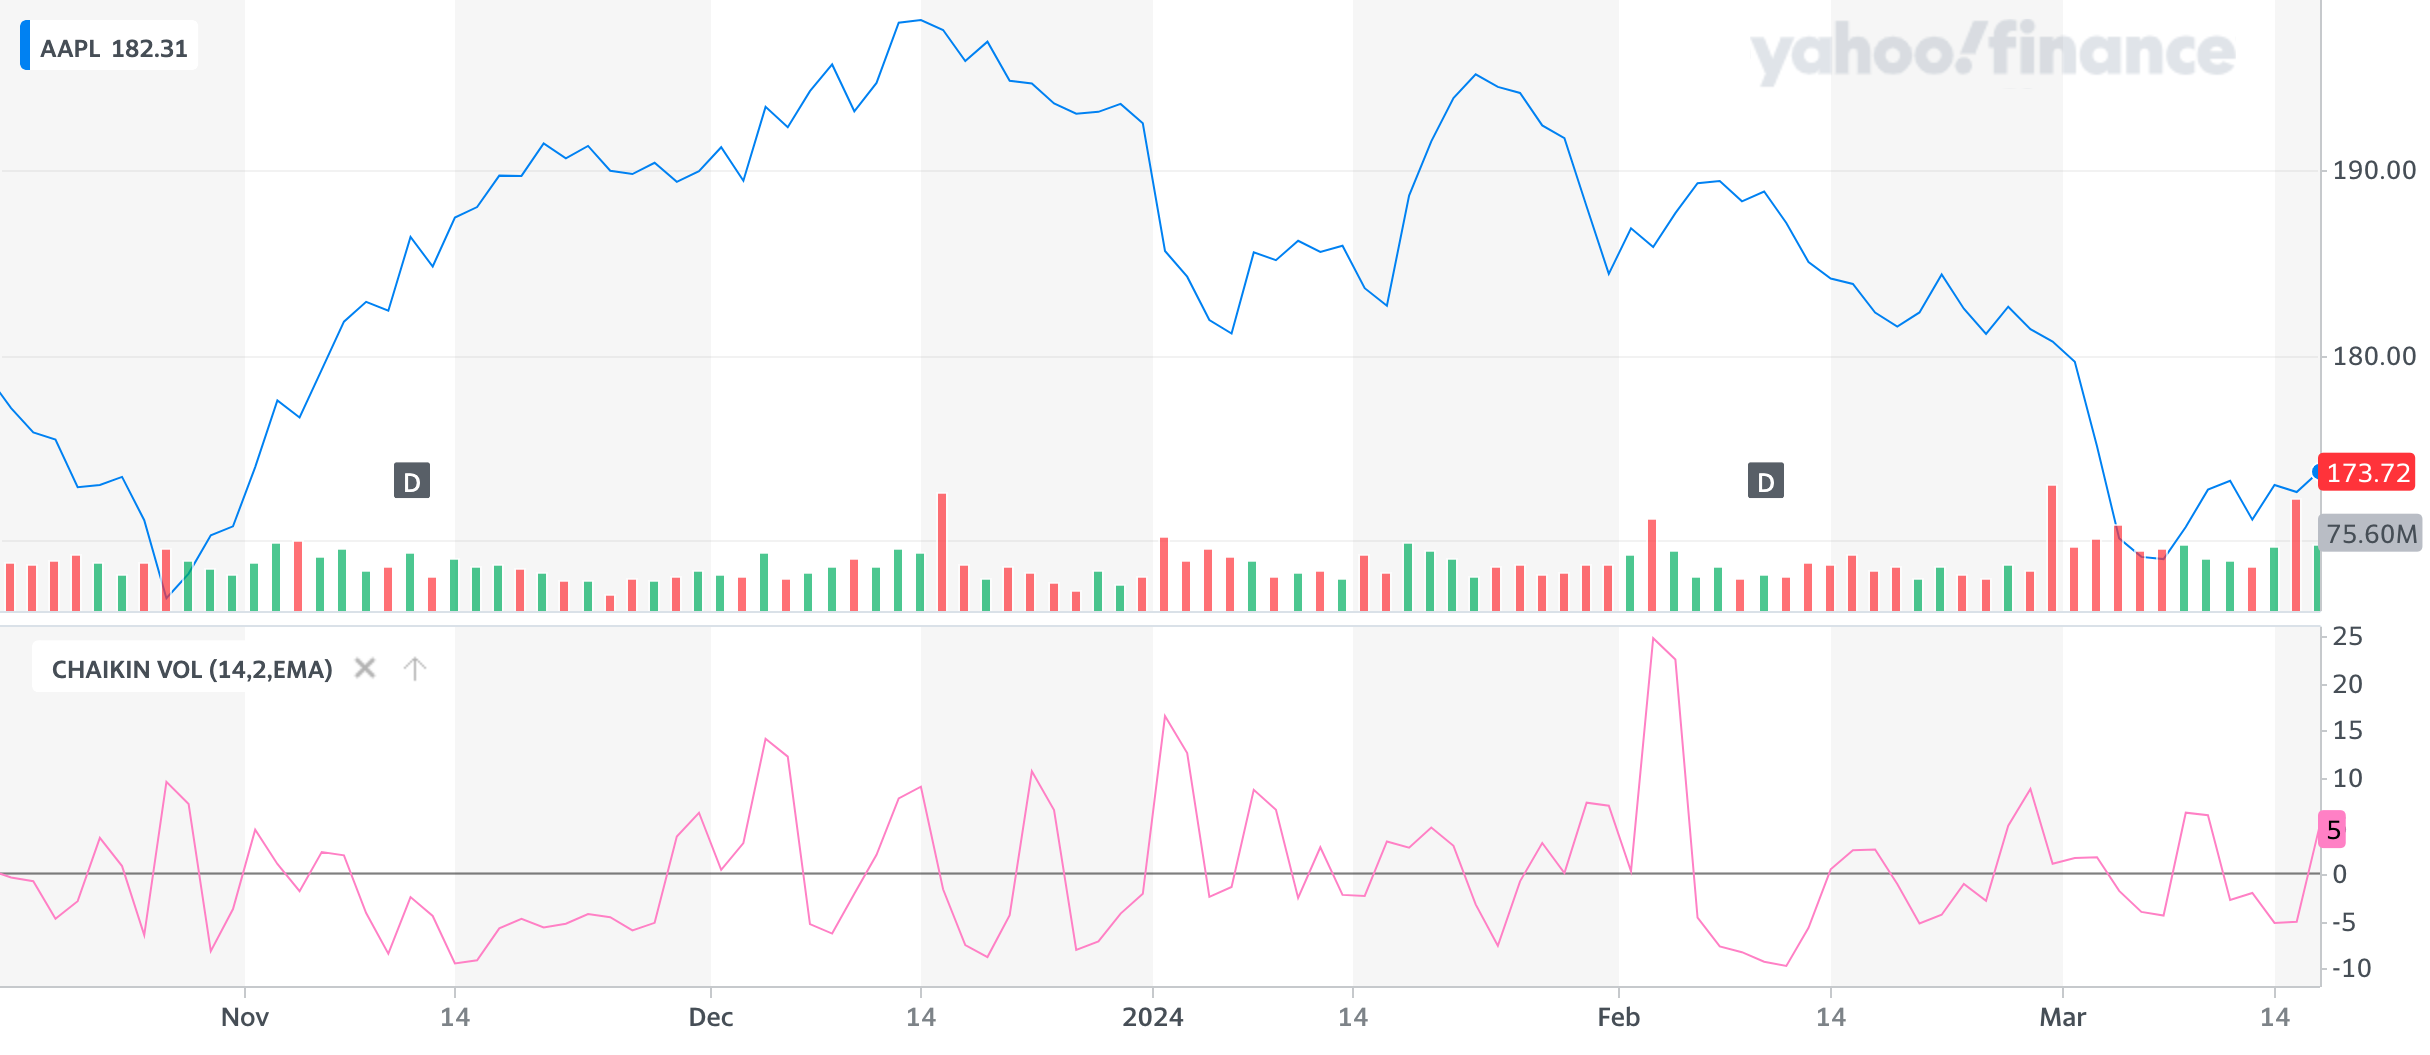

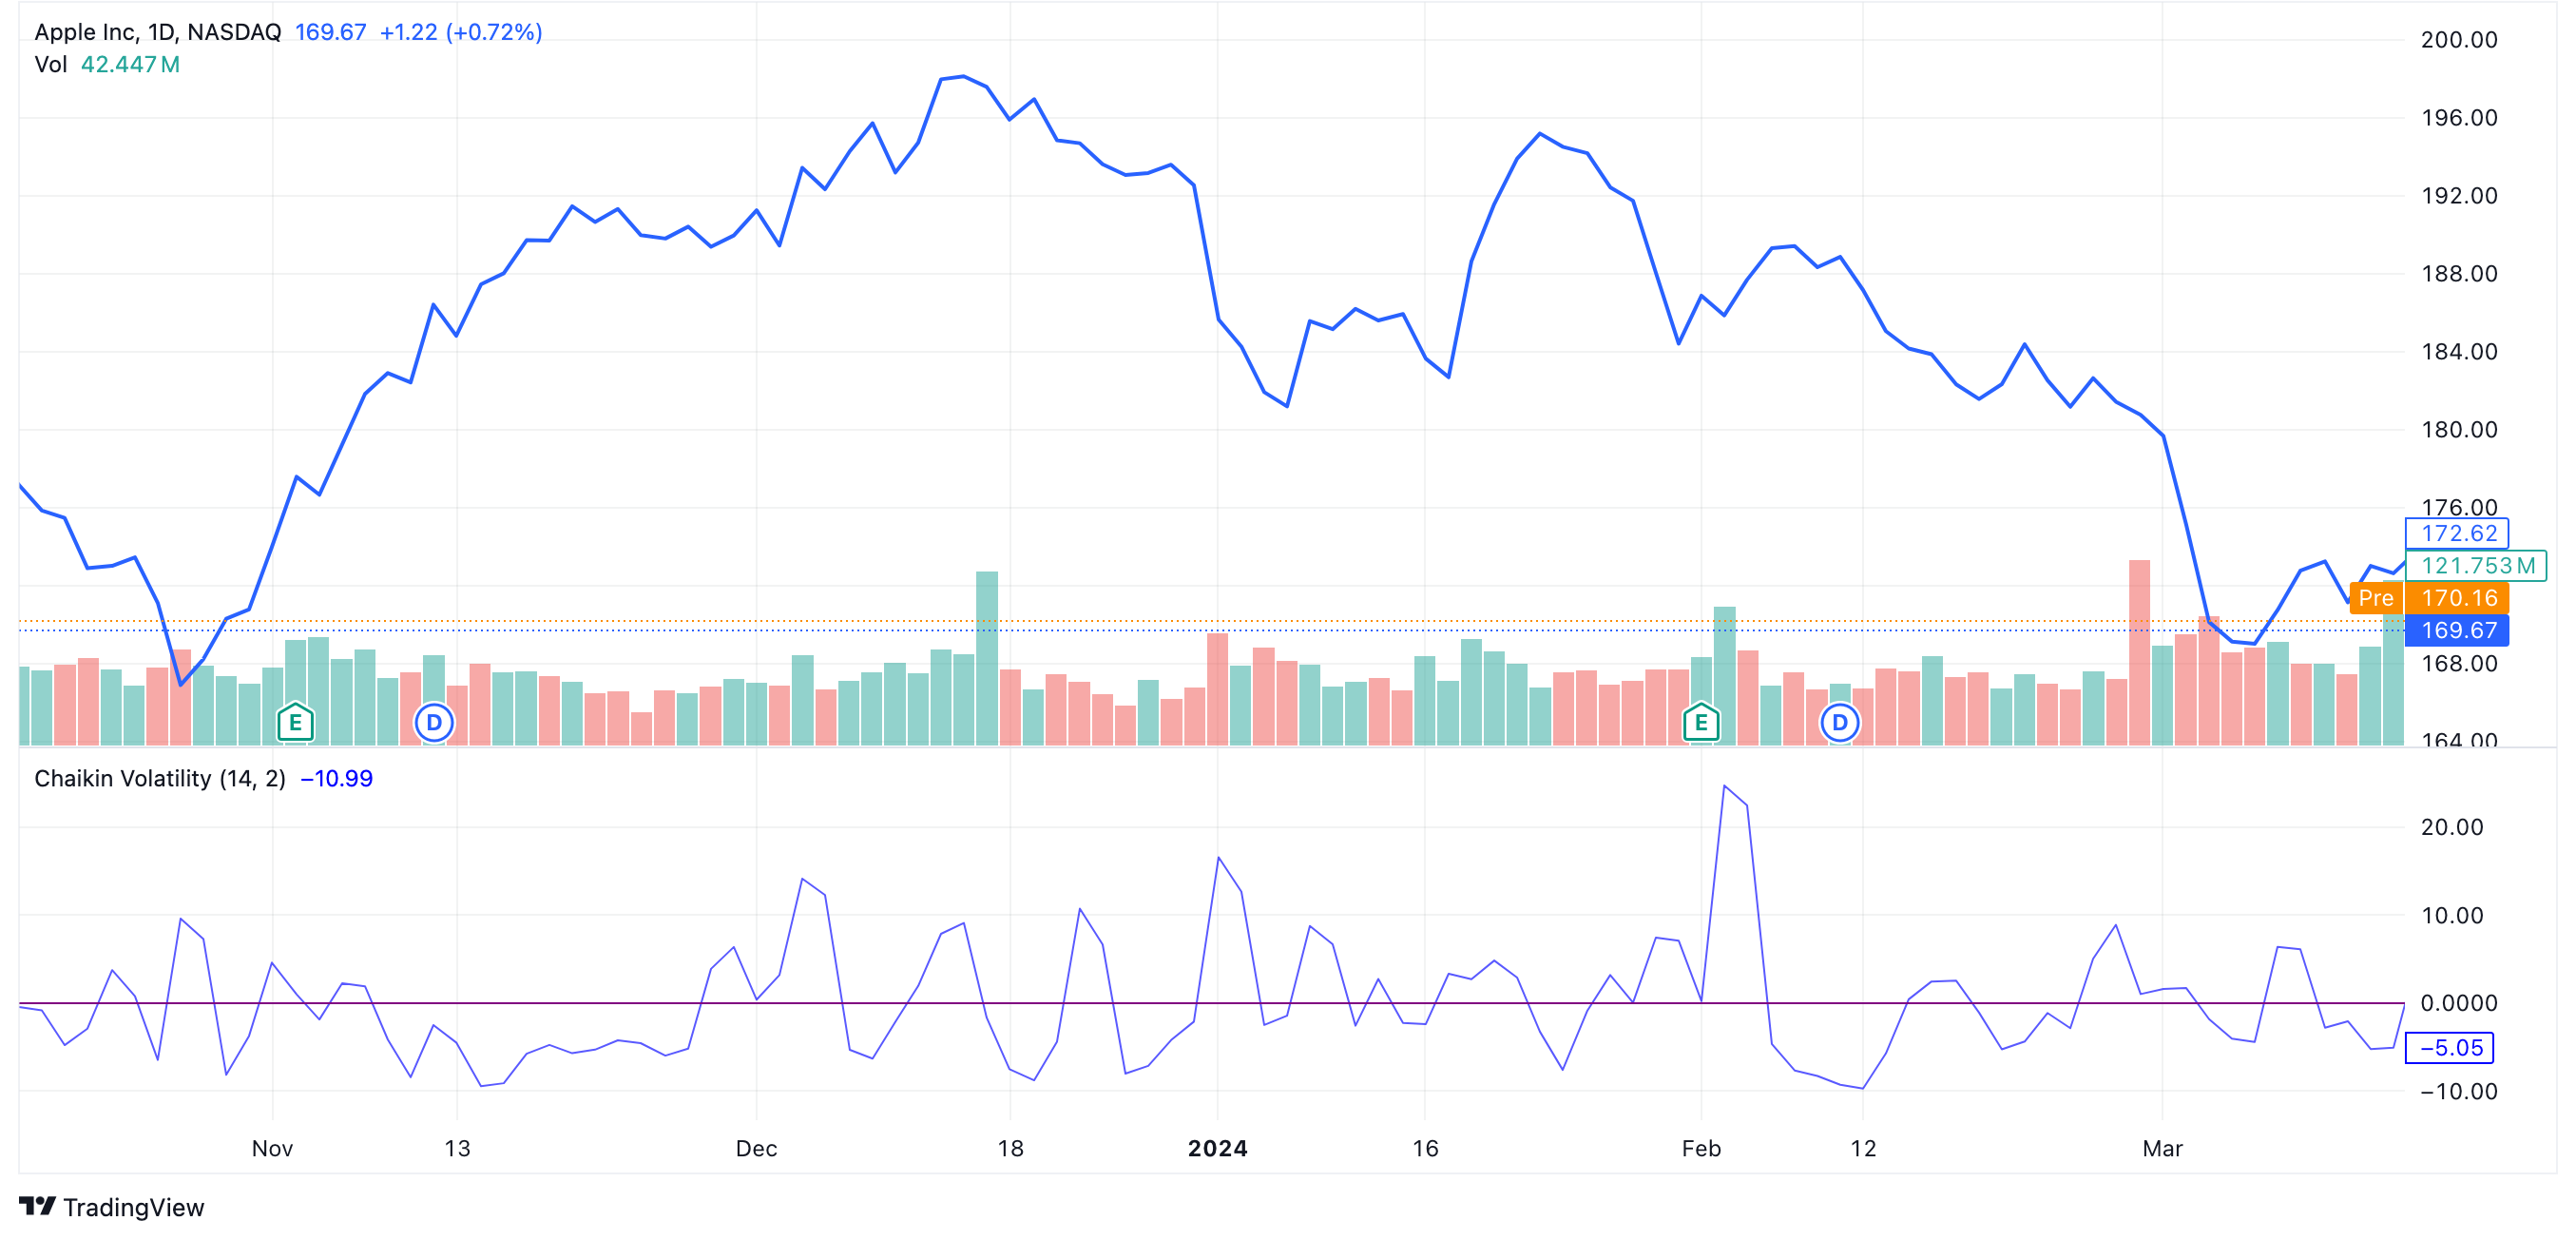

**Interpretacija:**

Pvz. spalio pradž. - lapkričio pab. mažesnis kintamumas, kaina kyla -> kaina išliks auganti -> PIRKTI

nuo sausio 1 d. iki sausio vidurio -> indikatoriaus reikšmės leidžiasi, kaina kyla -> kaina kris

Date
2023-10-17          NaN
2023-10-18          NaN
2023-10-19          NaN
2023-10-20          NaN
2023-10-23          NaN
                ...    
2024-03-12   -43.112009
2024-03-13   -57.853165
2024-03-14     3.217332
2024-03-15   -59.432577
2024-03-18   -60.953490
Length: 110, dtype: float64


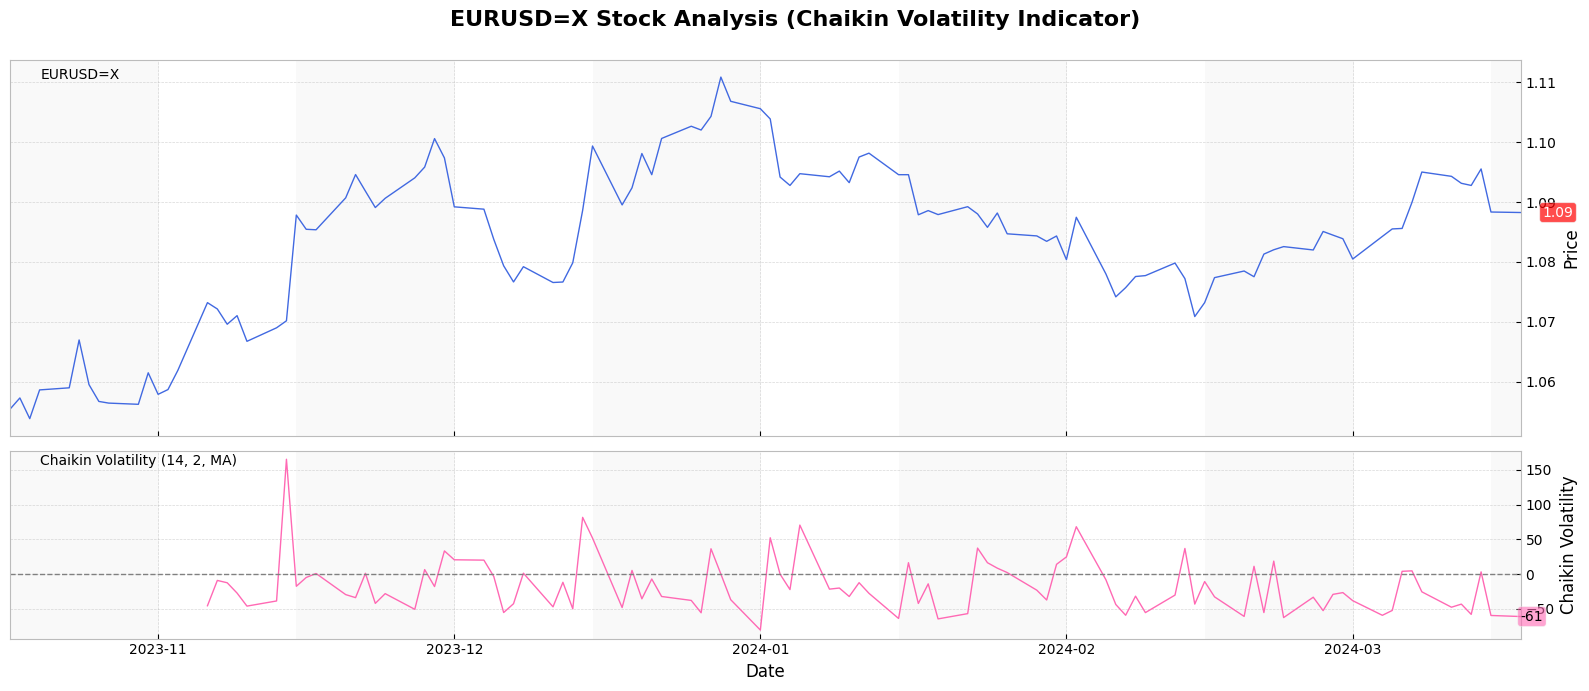

In [ ]:
# Skaiciuojama Chaikin Volatility Calculate indikatoriaus reiksmes (EURUSD duomenims)
chaikin_volatility_values2 = chaikin_volatility(data2)
print(chaikin_volatility_values2)
dates2 = data2.index # 'dates2' duomenu rinkinio indeksas

# Grafinis vaizdavimas
plot_stock_analysis(data2, dates2, chaikin_volatility_values2, period=14, label='EURUSD=X', indicator_name='Chaikin Volatility')

EURUSD=X_YahooFinanceChart_Chaikin_Volatility.png

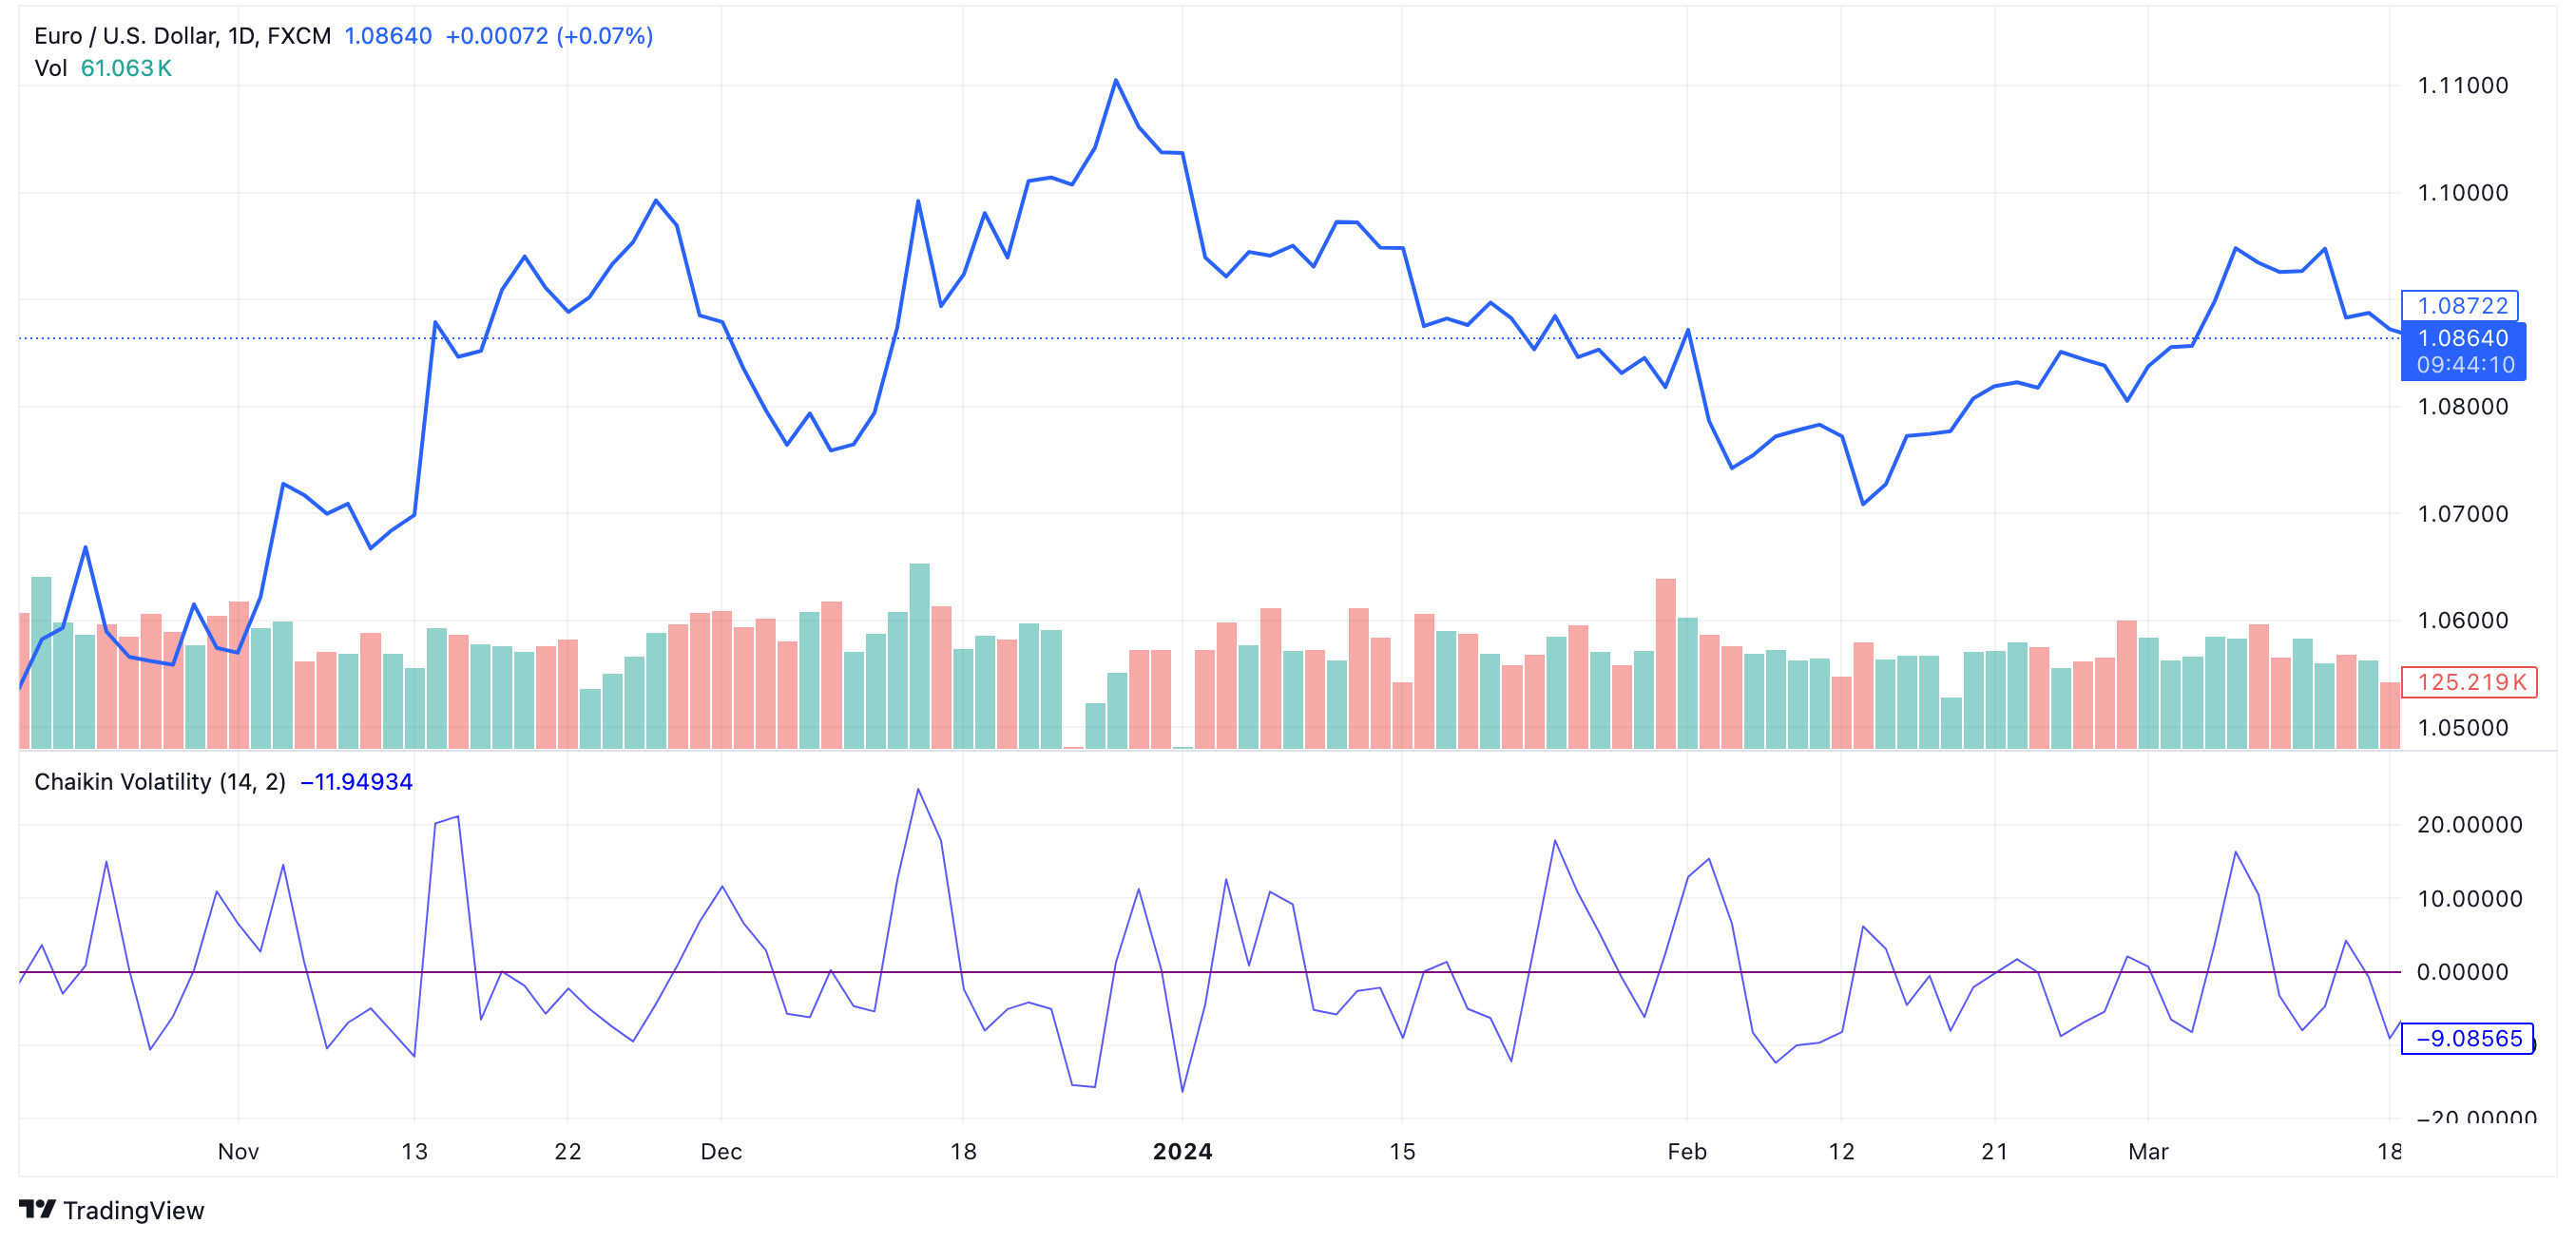

**Interpretacija:**

Pvz. nuo gruodžio 18 d. indikatoriaus reikšmės mažėja, kainos kyla: divergacija -> kaina mažės -> PARDUOTI

vasario 12 d. iki kovo vidurio indikatoriaus reikšmės didėja -> didesnis potencialas kainų augimui -> PIRKTI

Date
2023-10-17          NaN
2023-10-18          NaN
2023-10-19          NaN
2023-10-20          NaN
2023-10-23          NaN
                ...    
2024-03-11   -35.697225
2024-03-12   -44.063797
2024-03-13   -45.019820
2024-03-14   -15.059701
2024-03-15   -64.780881
Length: 104, dtype: float64


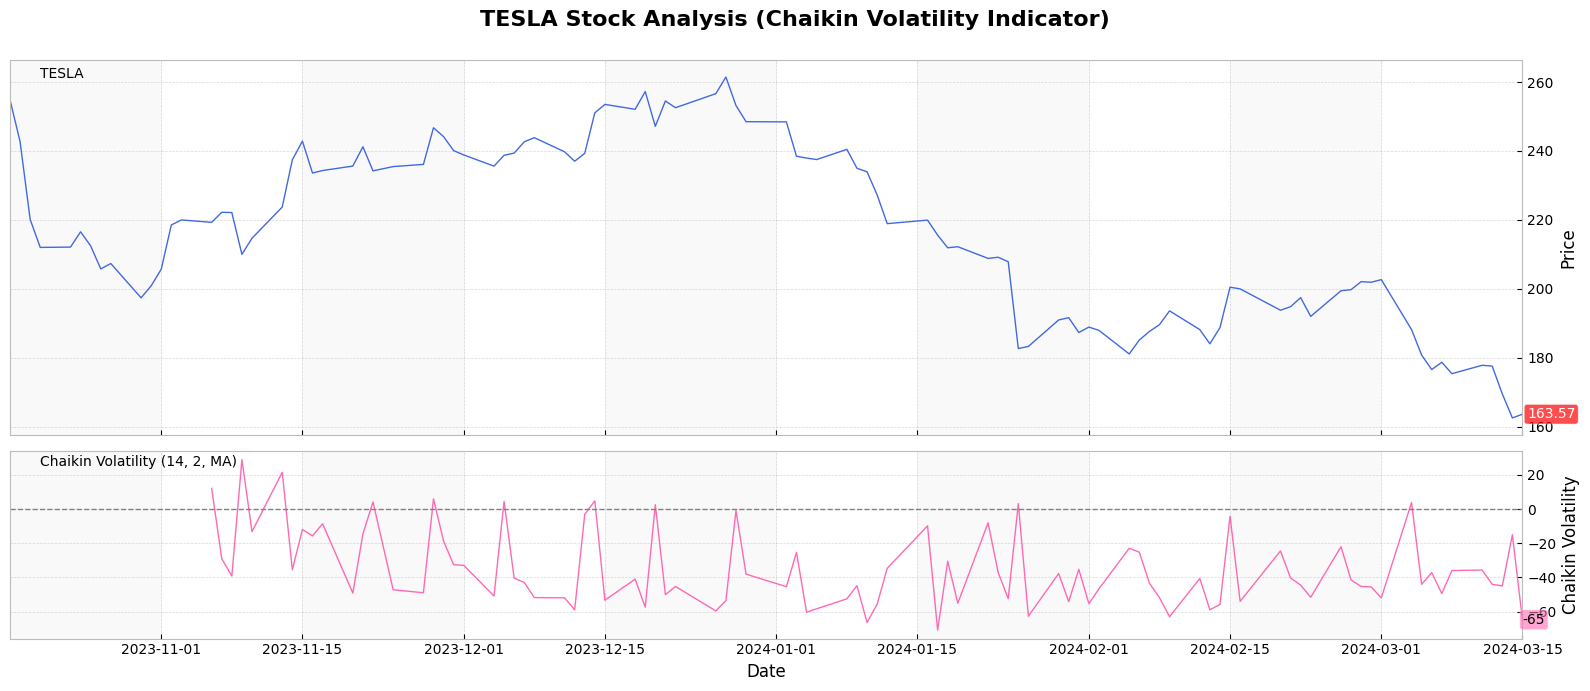

In [ ]:
# Skaiciuojama Chaikin Volatility Calculate indikatoriaus reiksmes (TESLA duomenims)
chaikin_volatility_values3 = chaikin_volatility(data3)
print(chaikin_volatility_values3)
dates3 = data3.index # 'dates3' duomenu rinkinio indeksas

# Grafinis vaizdavimas
plot_stock_analysis(data3, dates3, chaikin_volatility_values3, period=14, label='TESLA', indicator_name='Chaikin Volatility')

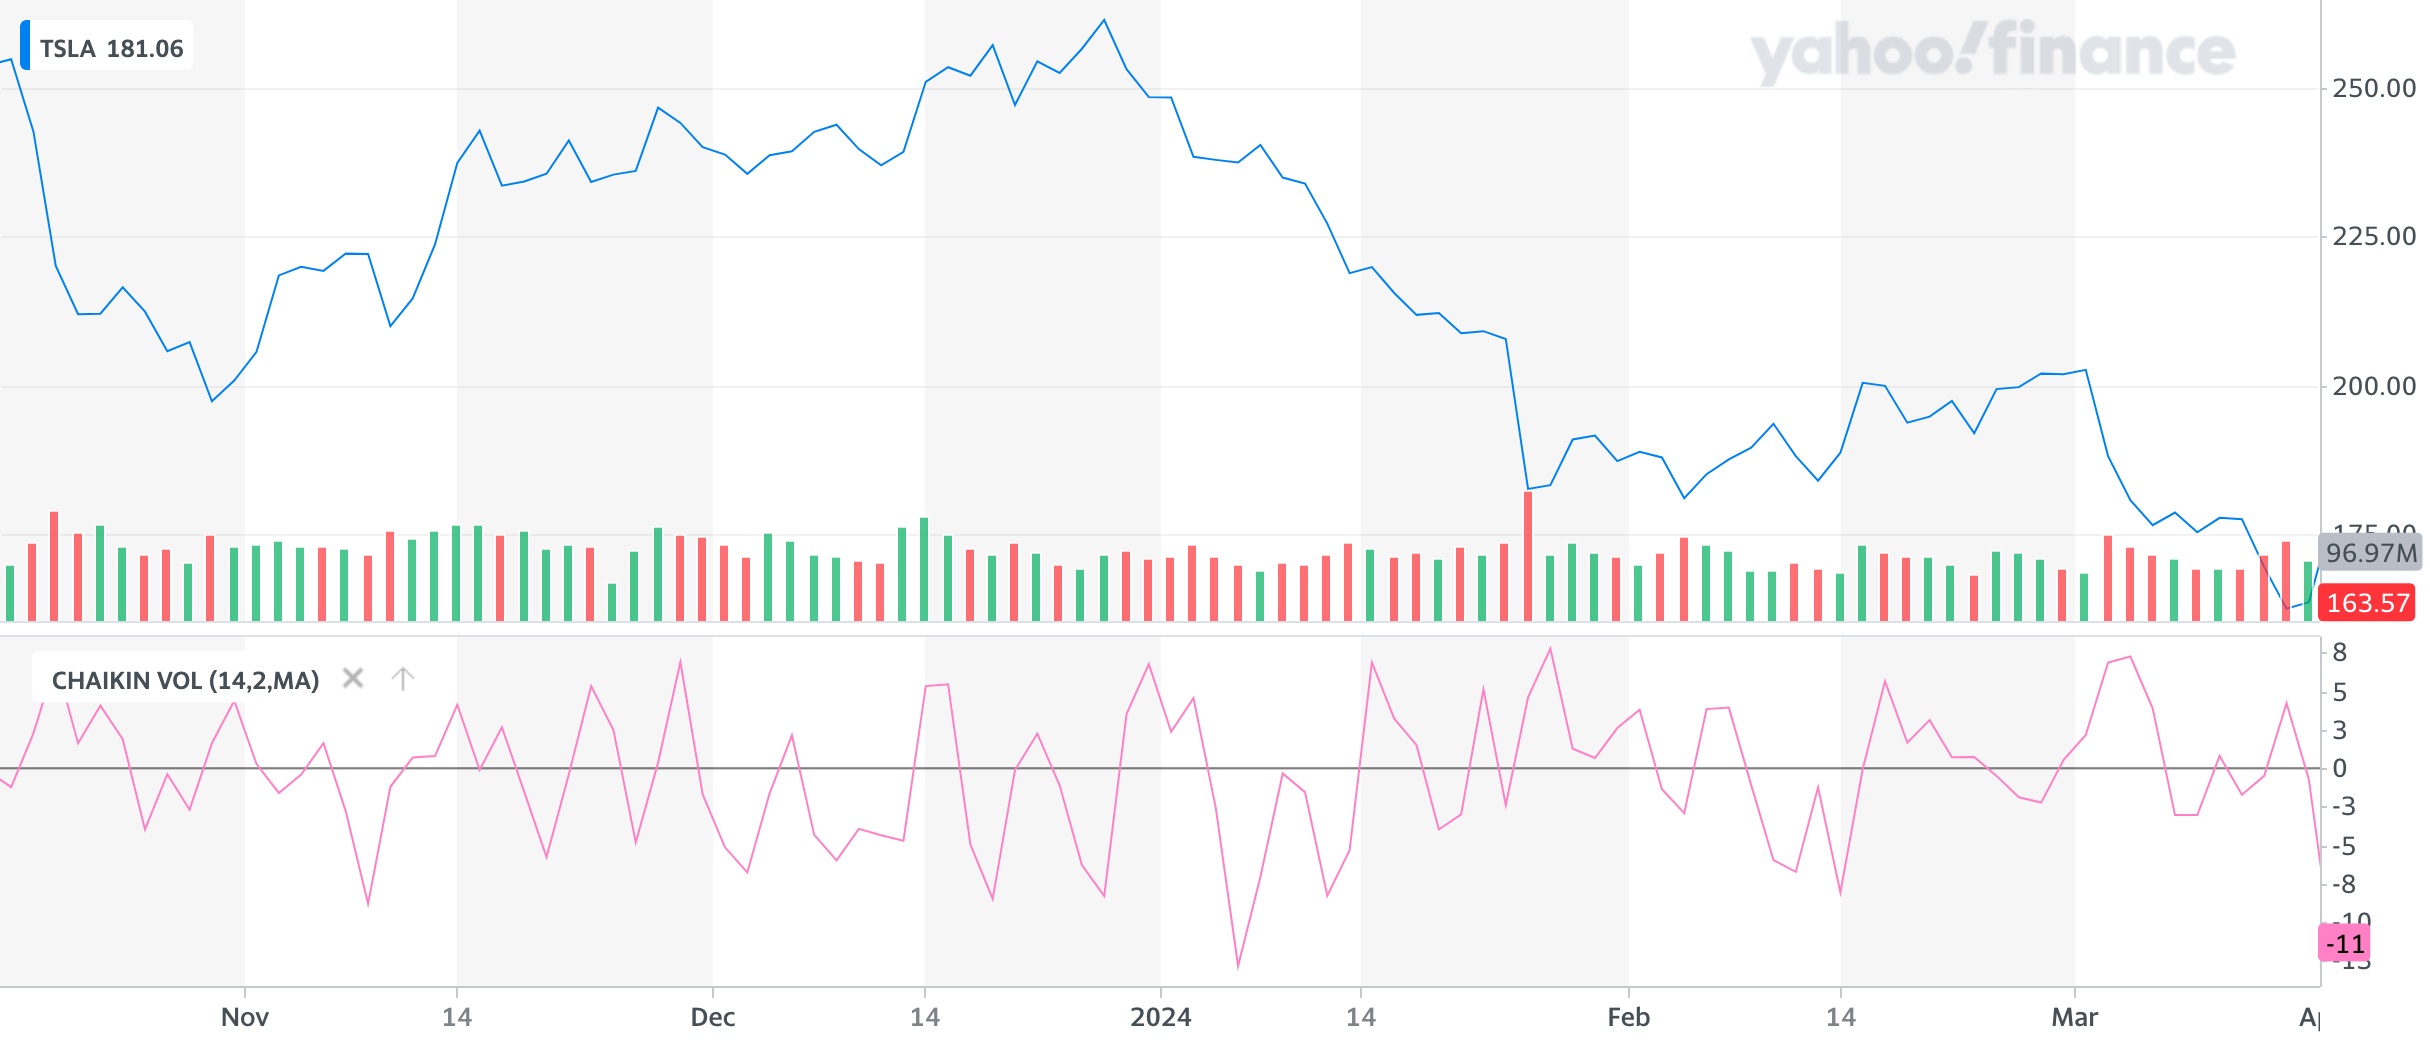

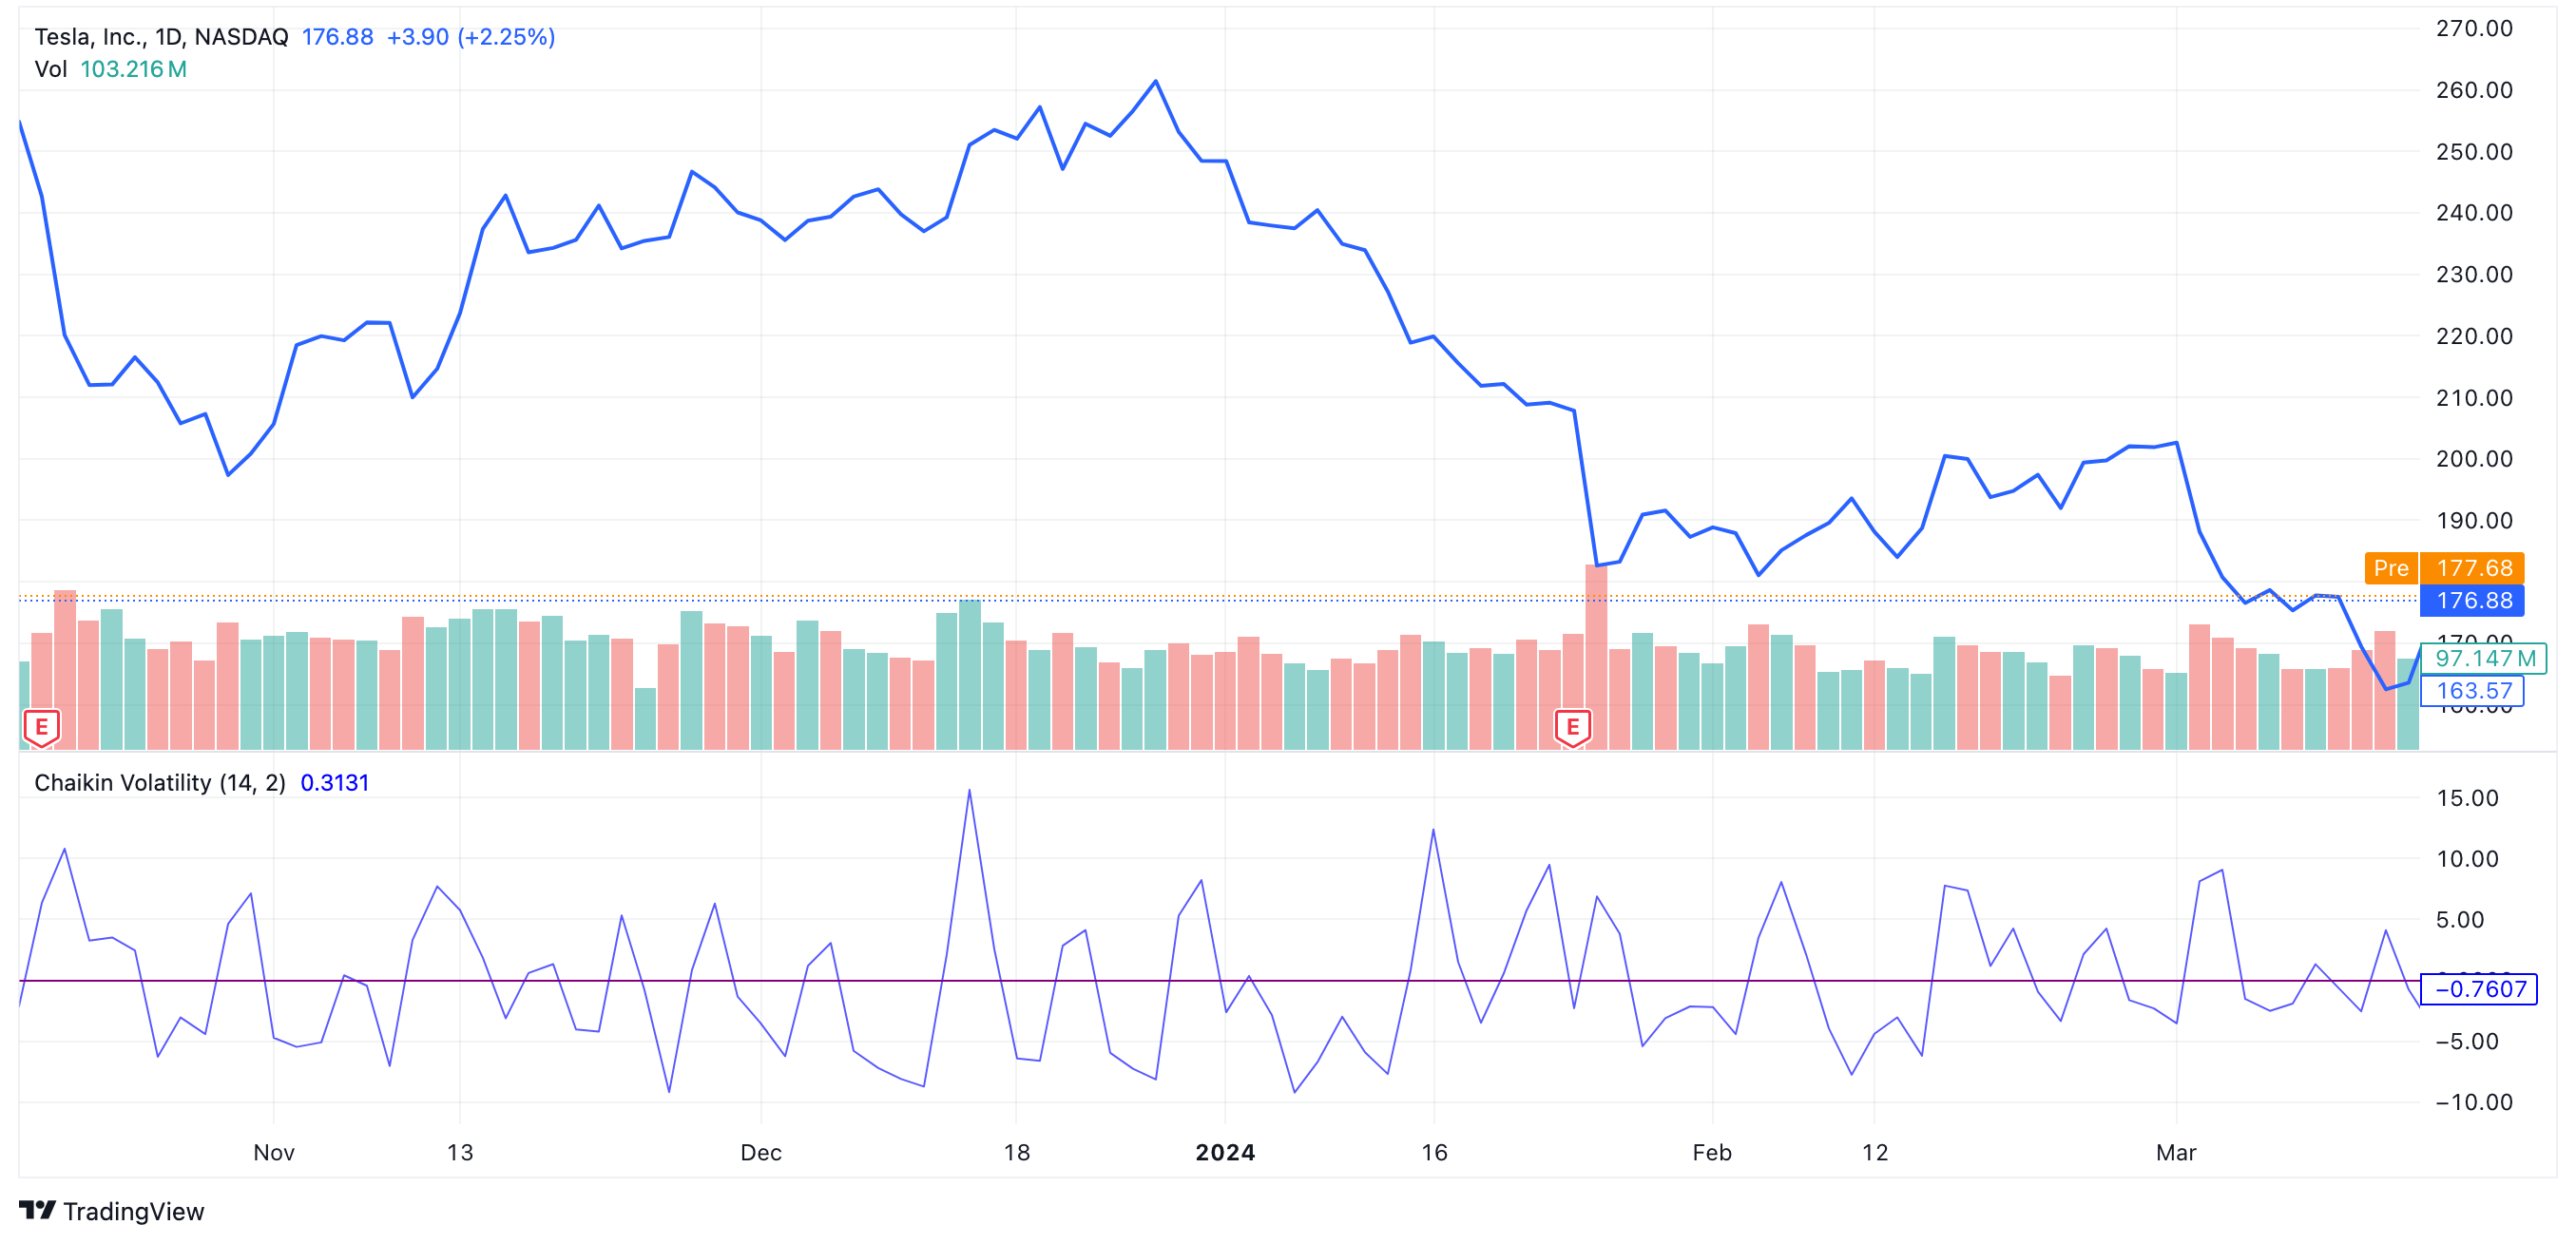

**Interpretacija:**

prieš gruodžio 18 d. indikatoriaus reikšmės ima mažėti (mažesnis kintamumas) -> kaina kris -> PARDUOTI

# Mass Index (MI) (kintamumo indikatorius)




*Mass Index* indikatorius naudojamas, siekiant nuspėti tendencijų pasikeitimus.

MI didėja, kai didėja (high - low) intervalas, ir mažėja, kai intervalas siaurėja

**Reversal Bulges (apsivertimo iškylimai)**: Kai šis indikatorius šokteli virš 27 ir sukuria "iškilimą", o tada nukrenta žemiau 26,5, akcijos yra pasirengusios keisti kursą.

Didesnė nei 27 rreikšmė -> rodo, kad rinka yra nepastovi, o mažesnis nei 26,5 rodiklis -> kintamumas mažas.

MI linija krenta -> PARDAVIMAS

MI linija kyla -> PIRKIMAS

**Divergavimas:** kaina ir indikatorius juda priešingomis kryptimis.

**Formulė**

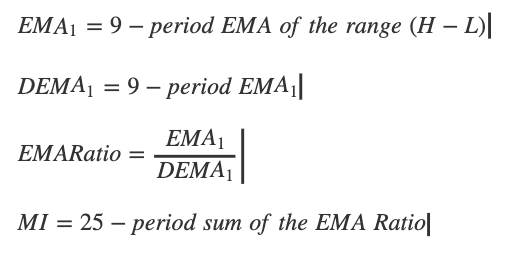


In [ ]:
def mass_index(data, period=25, ema_period=9, high_col='High', low_col='Low'):
    # Skaiciuojamas EMA1
    # Apskaiciuojama eksponentinio slenkancio vidurkio (EMA) reiksmes, naudojant nurodyta perioda
    ema1 = (data[high_col] - data[low_col]).ewm(span=ema_period, adjust=False).mean()

    # Skaiciuojamas DEMA1
    # Apskaiciuojama dvigubas eksponentinis slenkantis vidurkis (DEMA), naudojant nurodyta perioda
    dema1 = ema1.ewm(span=ema_period, adjust=False).mean()

    # Skaiciuojamas santykis EMARatio (duomenu eilute normalizuojama)
    ema_ratio = ema1 / dema1

    # Skaiciuojamos indikatoriau Mass Index reiksmes, naudojant praeitu reiksmiu sumavima (rolling window).
    mass_index_values = ema_ratio.rolling(window=period).sum()

    # Duomenyse pridedamas naujas stulpelis 'MI'
    data['MI'] = mass_index_values

    return data

In [ ]:
# Siekiant, kad indikatorius "igauti pagreiti" pradzioje

# def mass_index(data, period=25, ema_period=9, high_col='High', low_col='Low'):
#     high_low = data[high_col] - data[low_col] + 0.000001  # siekiant isvengti dalybos is 0
#     ema = high_low.ewm(span=ema_period, adjust=False).mean()
#     ema_ema = ema.ewm(span=ema_period, adjust=False).mean()
#     div = ema / ema_ema

#     mass_index_values = div.rolling(window=period, min_periods=0).sum()
#     data['MI'] = mass_index_values

#     return data

In [ ]:
# Pradzioje nutatoma pradinis periodas = 25

# def mass_index(data, period=25, ema_period=9, high_col='High', low_col='Low', bulge_threshold=27):
#     # Skaiciuojamas EMA1
#     ema1 = (data[high_col] - data[low_col]).ewm(span=ema_period, adjust=False).mean()

#     # Skaiciuojamas DEMA1
#     dema1 = ema1.ewm(span=ema_period, adjust=False).mean()

#     # Skaiciuojamas santykis EMARatio
#     ema_ratio = ema1 / dema1

#     # Initialize Mass Index with a default value
#     mass_index_values = pd.Series(index=data.index, data=25.0)  # nustatoma pradine reiksme 25

#     # Skaiciuojamos indikatoriau Mass Index reiksmes
#     for i in range(period, len(data)):
#         mass_index_values.iloc[i] = ema_ratio.iloc[max(0, i-period):i+1].sum()  # Adjusted index range

#     # duomenyse pridedamas naujas stulpelis 'MI'
#     data['MI'] = mass_index_values

#     return data

In [ ]:
# Skaiciuojama Mass Index indikatoriaus reiksmes (AAPL duomenims)
data_with_mass_index = mass_index(data)
data_with_mass_index

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-17  176.649994  178.419998  174.800003  177.149994  176.691452   
2023-10-18  175.580002  177.580002  175.110001  175.839996  175.384842   
2023-10-19  176.039993  177.839996  175.190002  175.460007  175.005844   
2023-10-20  175.309998  175.419998  172.639999  172.880005  172.432510   
2023-10-23  170.910004  174.009995  169.929993  173.000000  172.552200   
...                ...         ...         ...         ...         ...   
2024-03-11  172.940002  174.380005  172.050003  172.750000  172.750000   
2024-03-12  173.149994  174.029999  171.009995  173.229996  173.229996   
2024-03-13  172.770004  173.190002  170.759995  171.130005  171.130005   
2024-03-14  172.910004  174.309998  172.050003  173.000000  173.000000   
2024-03-15  171.169998  172.619995  170.289993  172.619995  172.619995   

               Volume         MI  
Date                              
2023-10-17   57549400        NaN  
2023-10-18   54764400        NaN  
2023-10-19   59302900        NaN  
2023-10-20   64189300        NaN  
2023-10-23   55980100        NaN  
...               ...        ...  
2024-03-11   60139500  24.756221  
2024-03-12   59825400  24.572998  
2024-03-13   52488700  24.465393  
2024-03-14   72913500  24.402576  
2024-03-15  121664700  24.386289  

[104 rows x 7 columns]

In [ ]:
data_with_mass_index['MI'].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 23.50656968,
       23.37486777, 23.31777893, 23.27229496, 23.23835019, 23.14418295,
       23.21209779, 23.30056698, 23.25219376, 23.31093024, 23.54037803,
       23.72251048, 23.73036237, 23.77760865, 23.77372155, 23.81250459,
       23.87317338, 24.04478024, 24.12846776, 24.16840336, 24.16619549,
       24.25912666, 24.46645317, 24.62955544, 24.69824334, 24.77995642,
       24.82078658, 24.89430513, 25.14409658, 25.34616871, 25.50277938,
       25.54022167, 25.66690413, 25.72526961, 25.7226632 , 25.62655944,
       25.47578348, 25.4836825 , 25.48889336, 25.54913224, 25.56823735,
       25.54779286, 25.41957504, 25.36448193, 25.37006127, 25.47

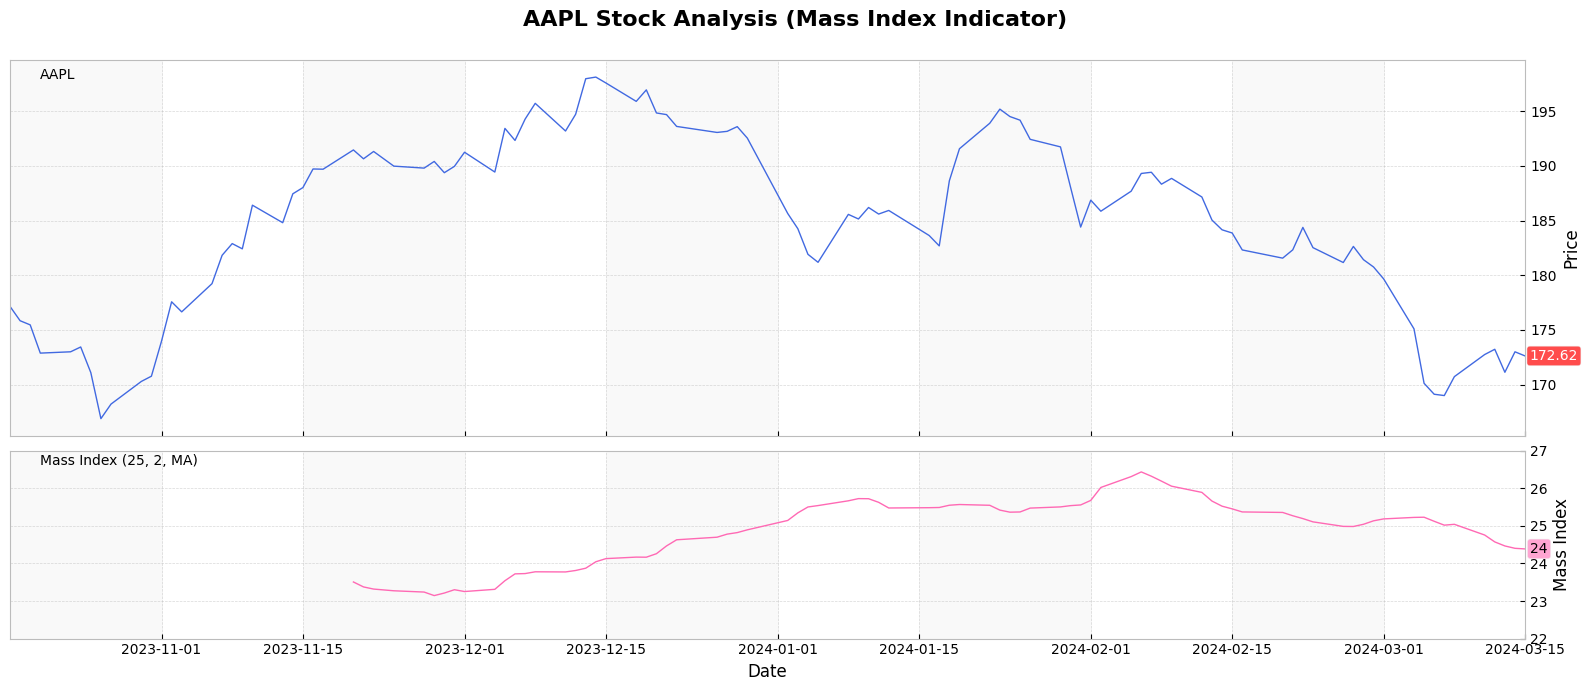

In [ ]:
# Istraukiami duomenys (data ir indikatorius), reikalingi grafikams nubraizyti
dates = data.index
mass_index_values = data['MI']

# Call plotting function for data
plot_stock_analysis(data, dates, mass_index_values, period=25, label='AAPL', indicator_name='Mass Index')

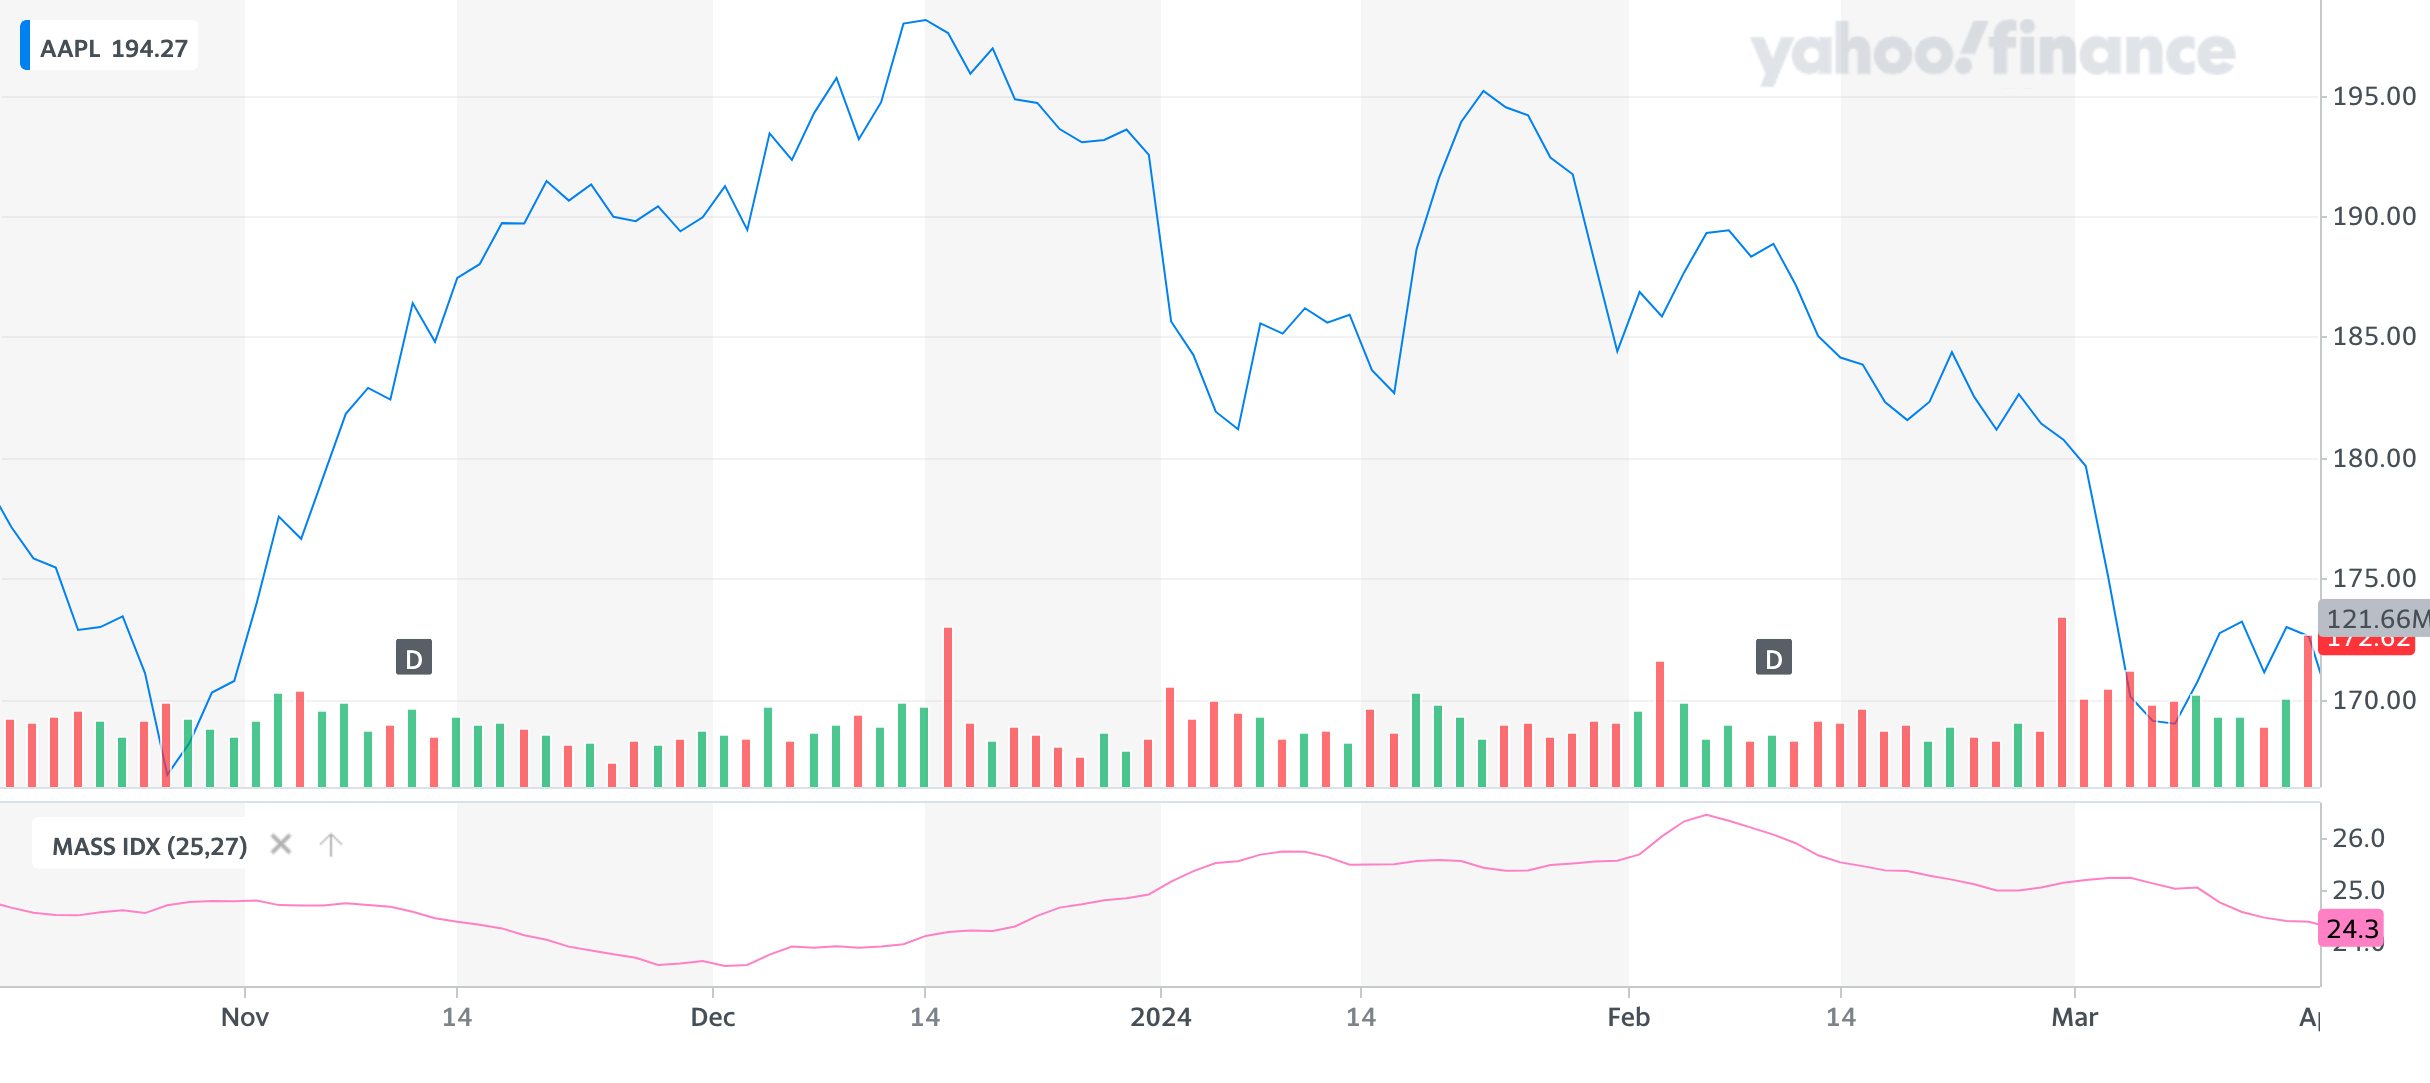

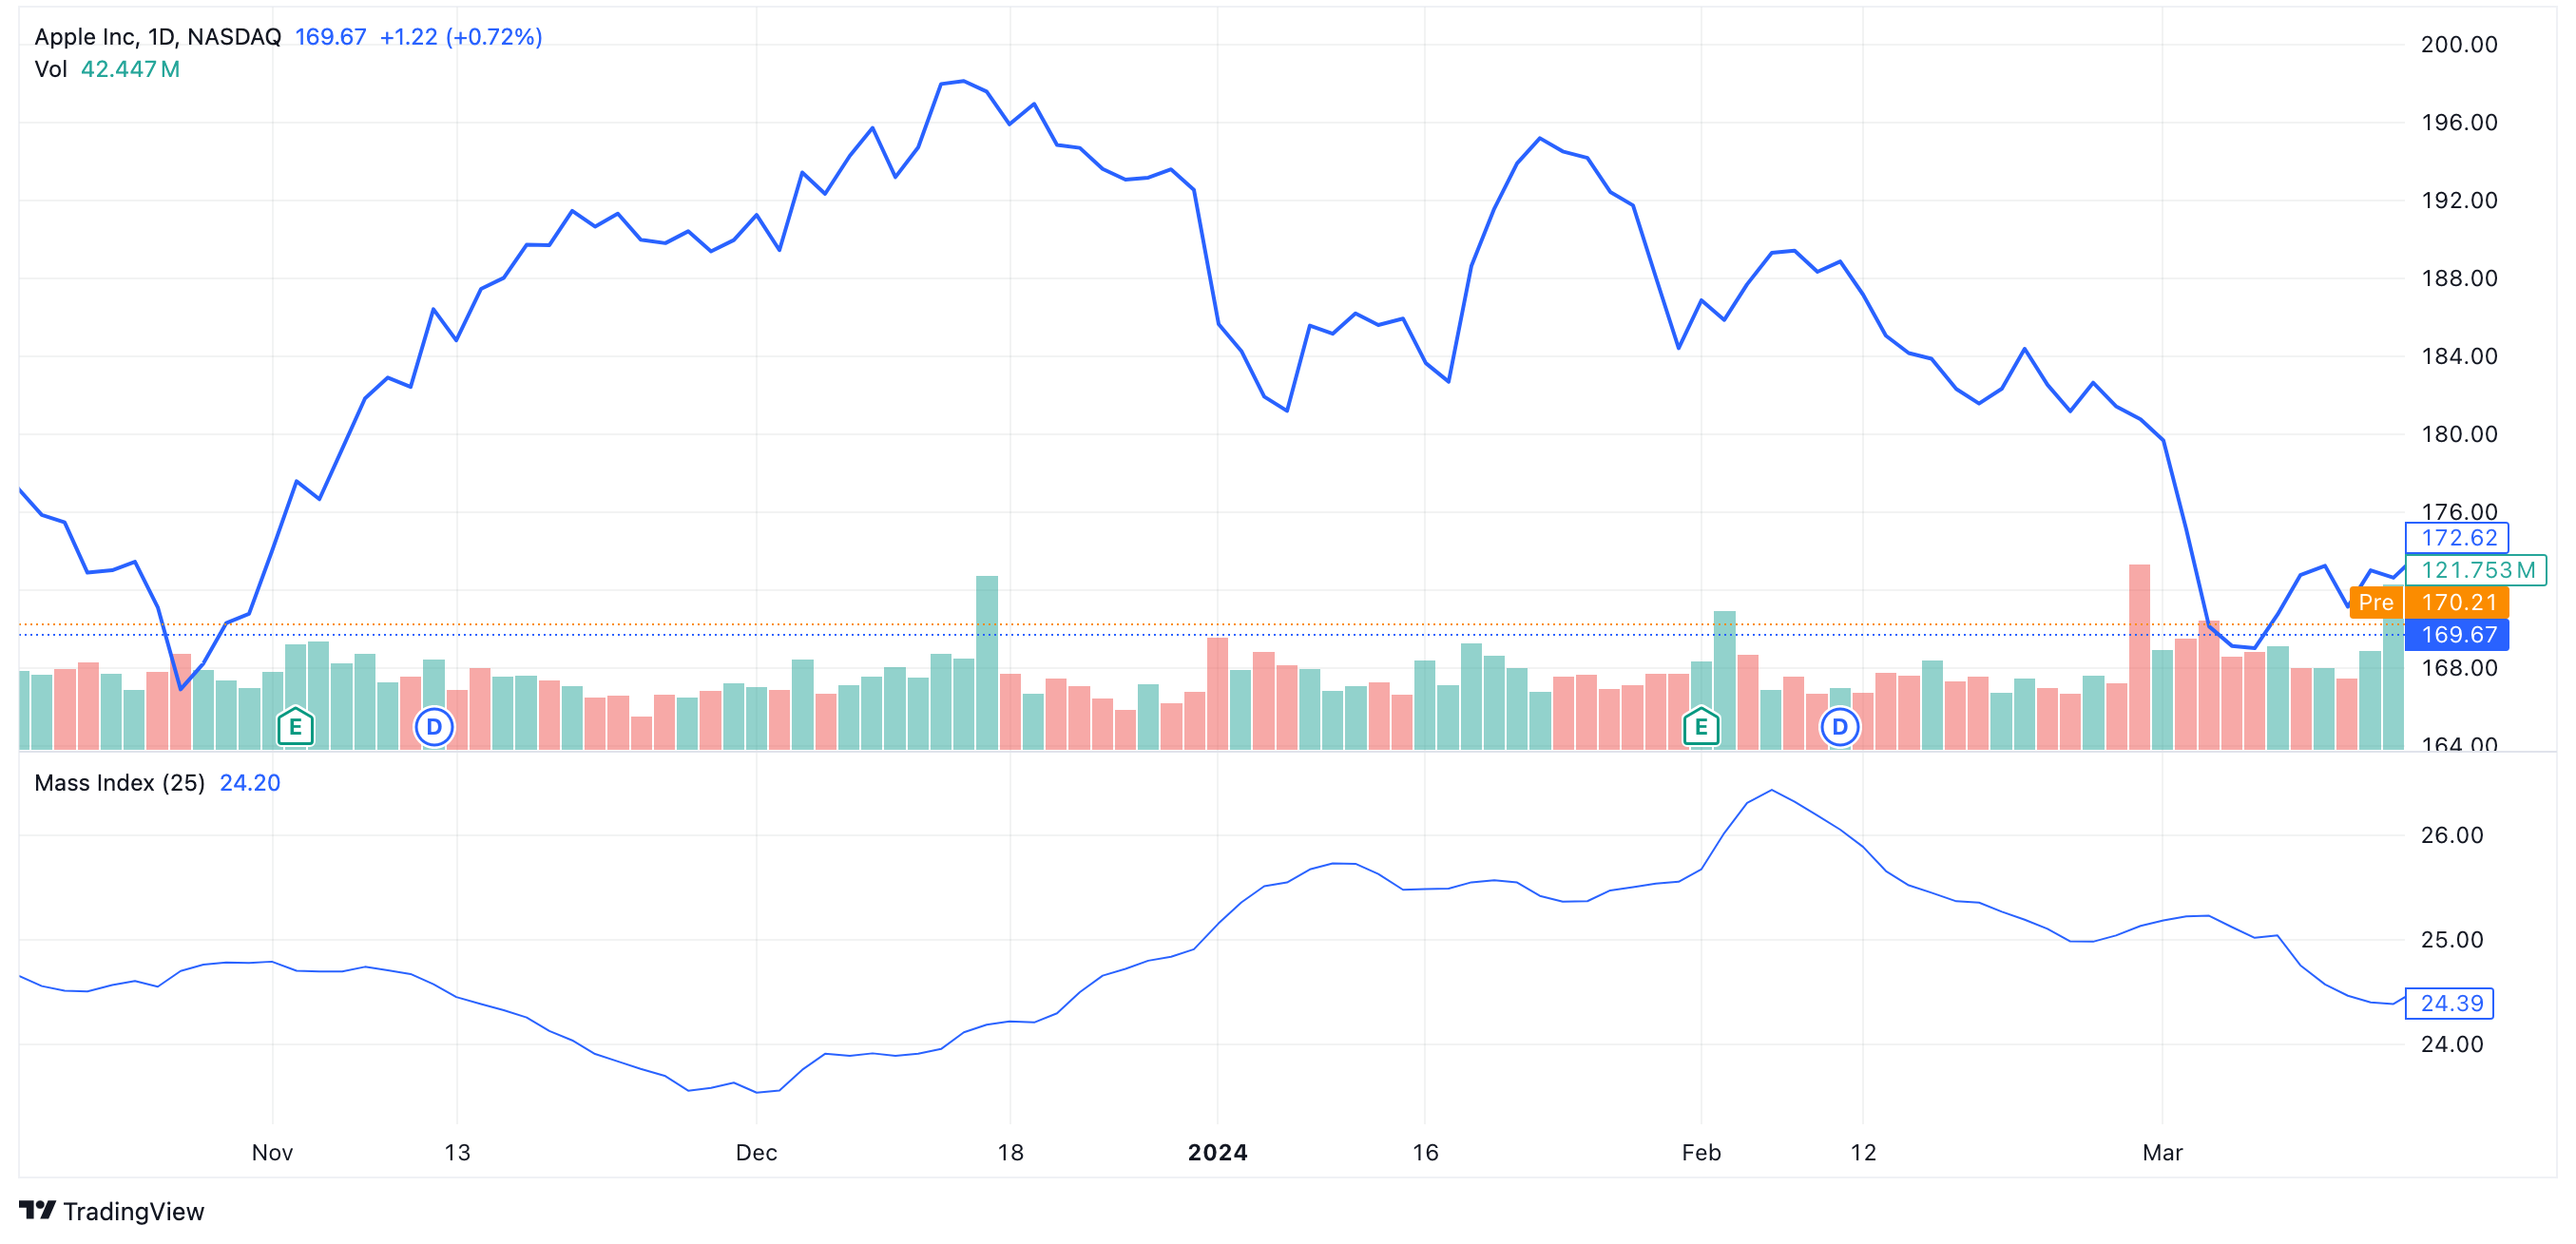

In [ ]:
# Skaiciuojama Mass Index indikatoriaus reiksmes (EURUSD duomenims)
data_with_mass_index2 = mass_index(data2)
data_with_mass_index2

Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
2023-10-17  1.055431  1.059500  1.053341  1.055431   1.055431       0   
2023-10-18  1.057306  1.059547  1.052709  1.057306   1.057306       0   
2023-10-19  1.053852  1.058537  1.052886  1.053852   1.053852       0   
2023-10-20  1.058649  1.060108  1.056580  1.058649   1.058649       0   
2023-10-23  1.058997  1.064736  1.057183  1.058997   1.058997       0   
...              ...       ...       ...       ...        ...     ...   
2024-03-12  1.093135  1.094212  1.090322  1.093135   1.093135       0   
2024-03-13  1.092777  1.094931  1.092049  1.092777   1.092777       0   
2024-03-14  1.095530  1.095470  1.088412  1.095530   1.095530       0   
2024-03-15  1.088341  1.090156  1.087382  1.088341   1.088341       0   
2024-03-18  1.088258  1.090750  1.088080  1.088258   1.088258       0   

                   MI  
Date                   
2023-10-17        NaN  
2023-10-18        NaN  
2023-10-19        NaN  
2023-10-20        NaN  
2023-10-23        NaN  
...               ...  
2024-03-12  23.694699  
2024-03-13  23.698923  
2024-03-14  23.829229  
2024-03-15  23.934114  
2024-03-18  23.968727  

[110 rows x 7 columns]

In [ ]:
data_with_mass_index2['MI'].values

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 25.36972286,
       25.29029453, 25.22456607, 25.12886813, 25.09581164, 24.95588187,
       24.77927102, 24.71321282, 24.80653488, 24.92624325, 25.01289761,
       24.97612888, 24.88430645, 24.71239301, 24.49501627, 24.37067452,
       24.32053832, 24.25137549, 24.44168717, 24.75637888, 24.9566731 ,
       24.83516615, 24.73794391, 24.6866755 , 24.61290502, 24.56297995,
       24.5028417 , 24.5538011 , 24.67866219, 24.75614474, 24.7566477 ,
       24.85807425, 24.96255188, 24.92888609, 24.99969221, 24.97186907,
       24.92728326, 24.94019907, 25.0042079 , 24.99361518, 24.9550318 ,
       24.98382121, 25.01794792, 24.86009404, 24.55198435, 24.34

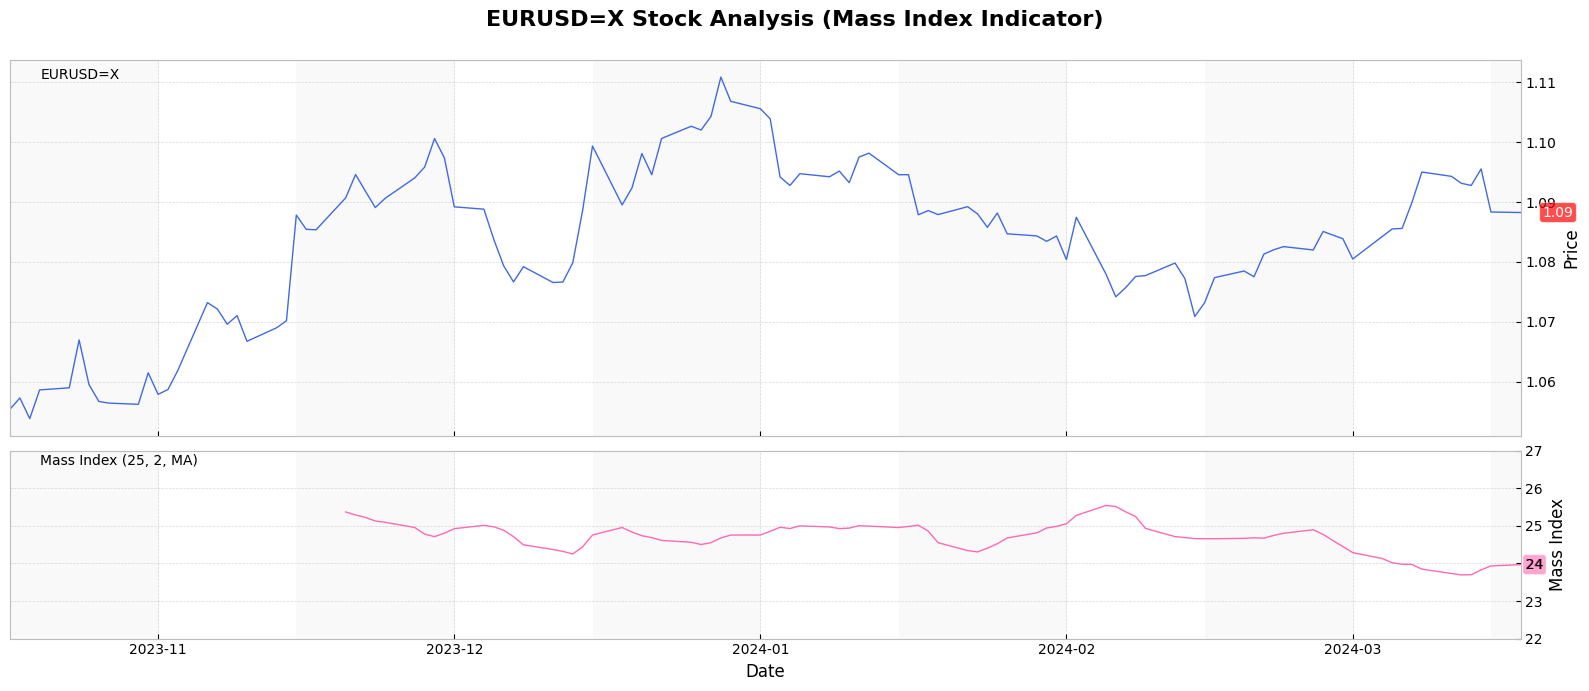

In [ ]:
# Istraukiami duomenys (data ir indikatorius), reikalingi grafikams nubraizyti
dates2 = data2.index
mass_index_values2 = data2['MI']

# Grafinis vaizdavimas
plot_stock_analysis(data2, dates2, mass_index_values2, period=25, label='EURUSD=X', indicator_name='Mass Index')

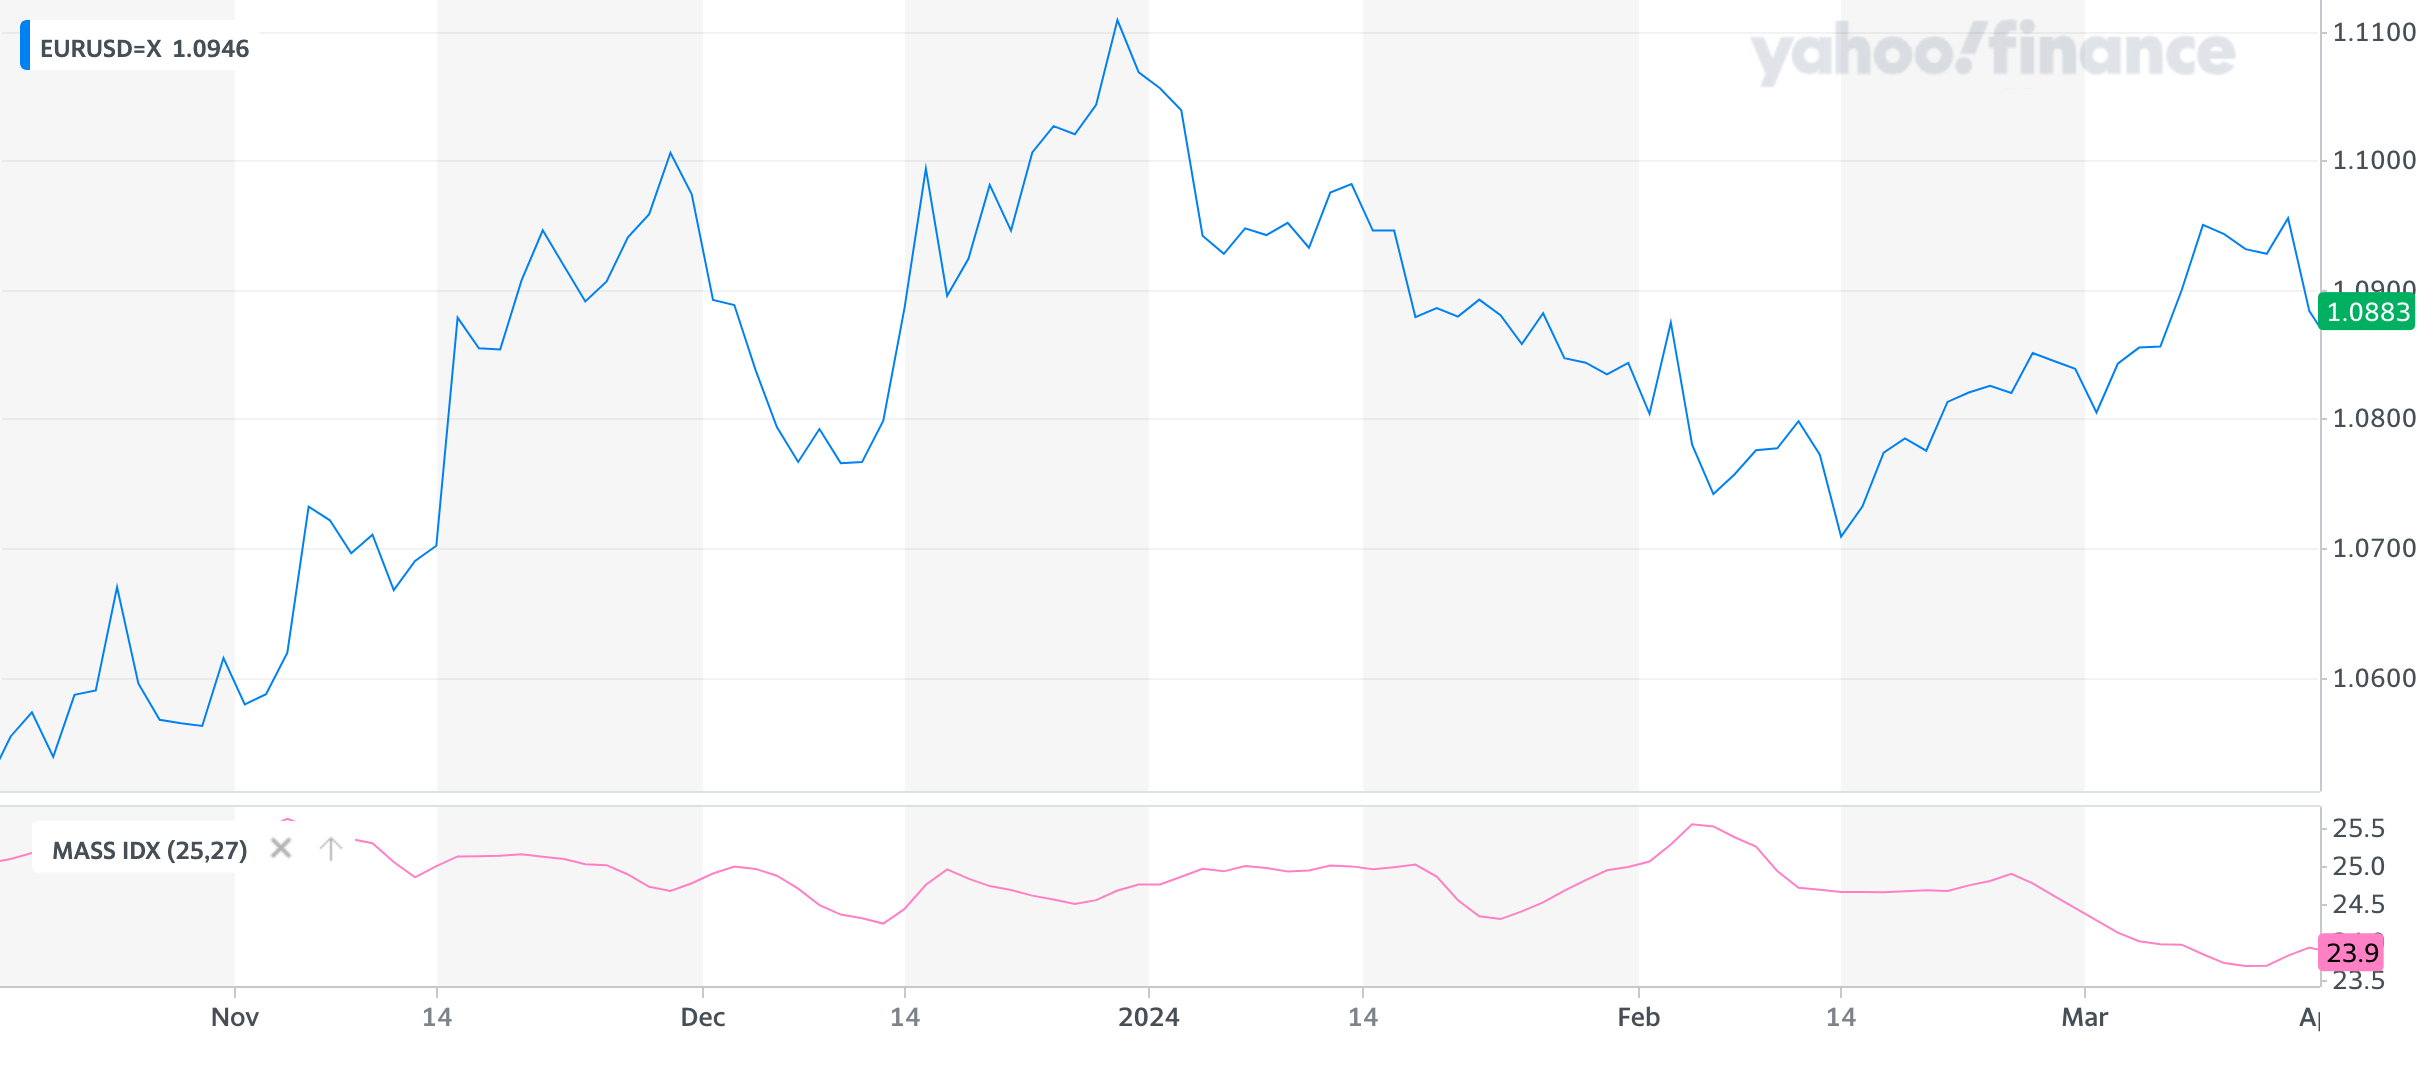

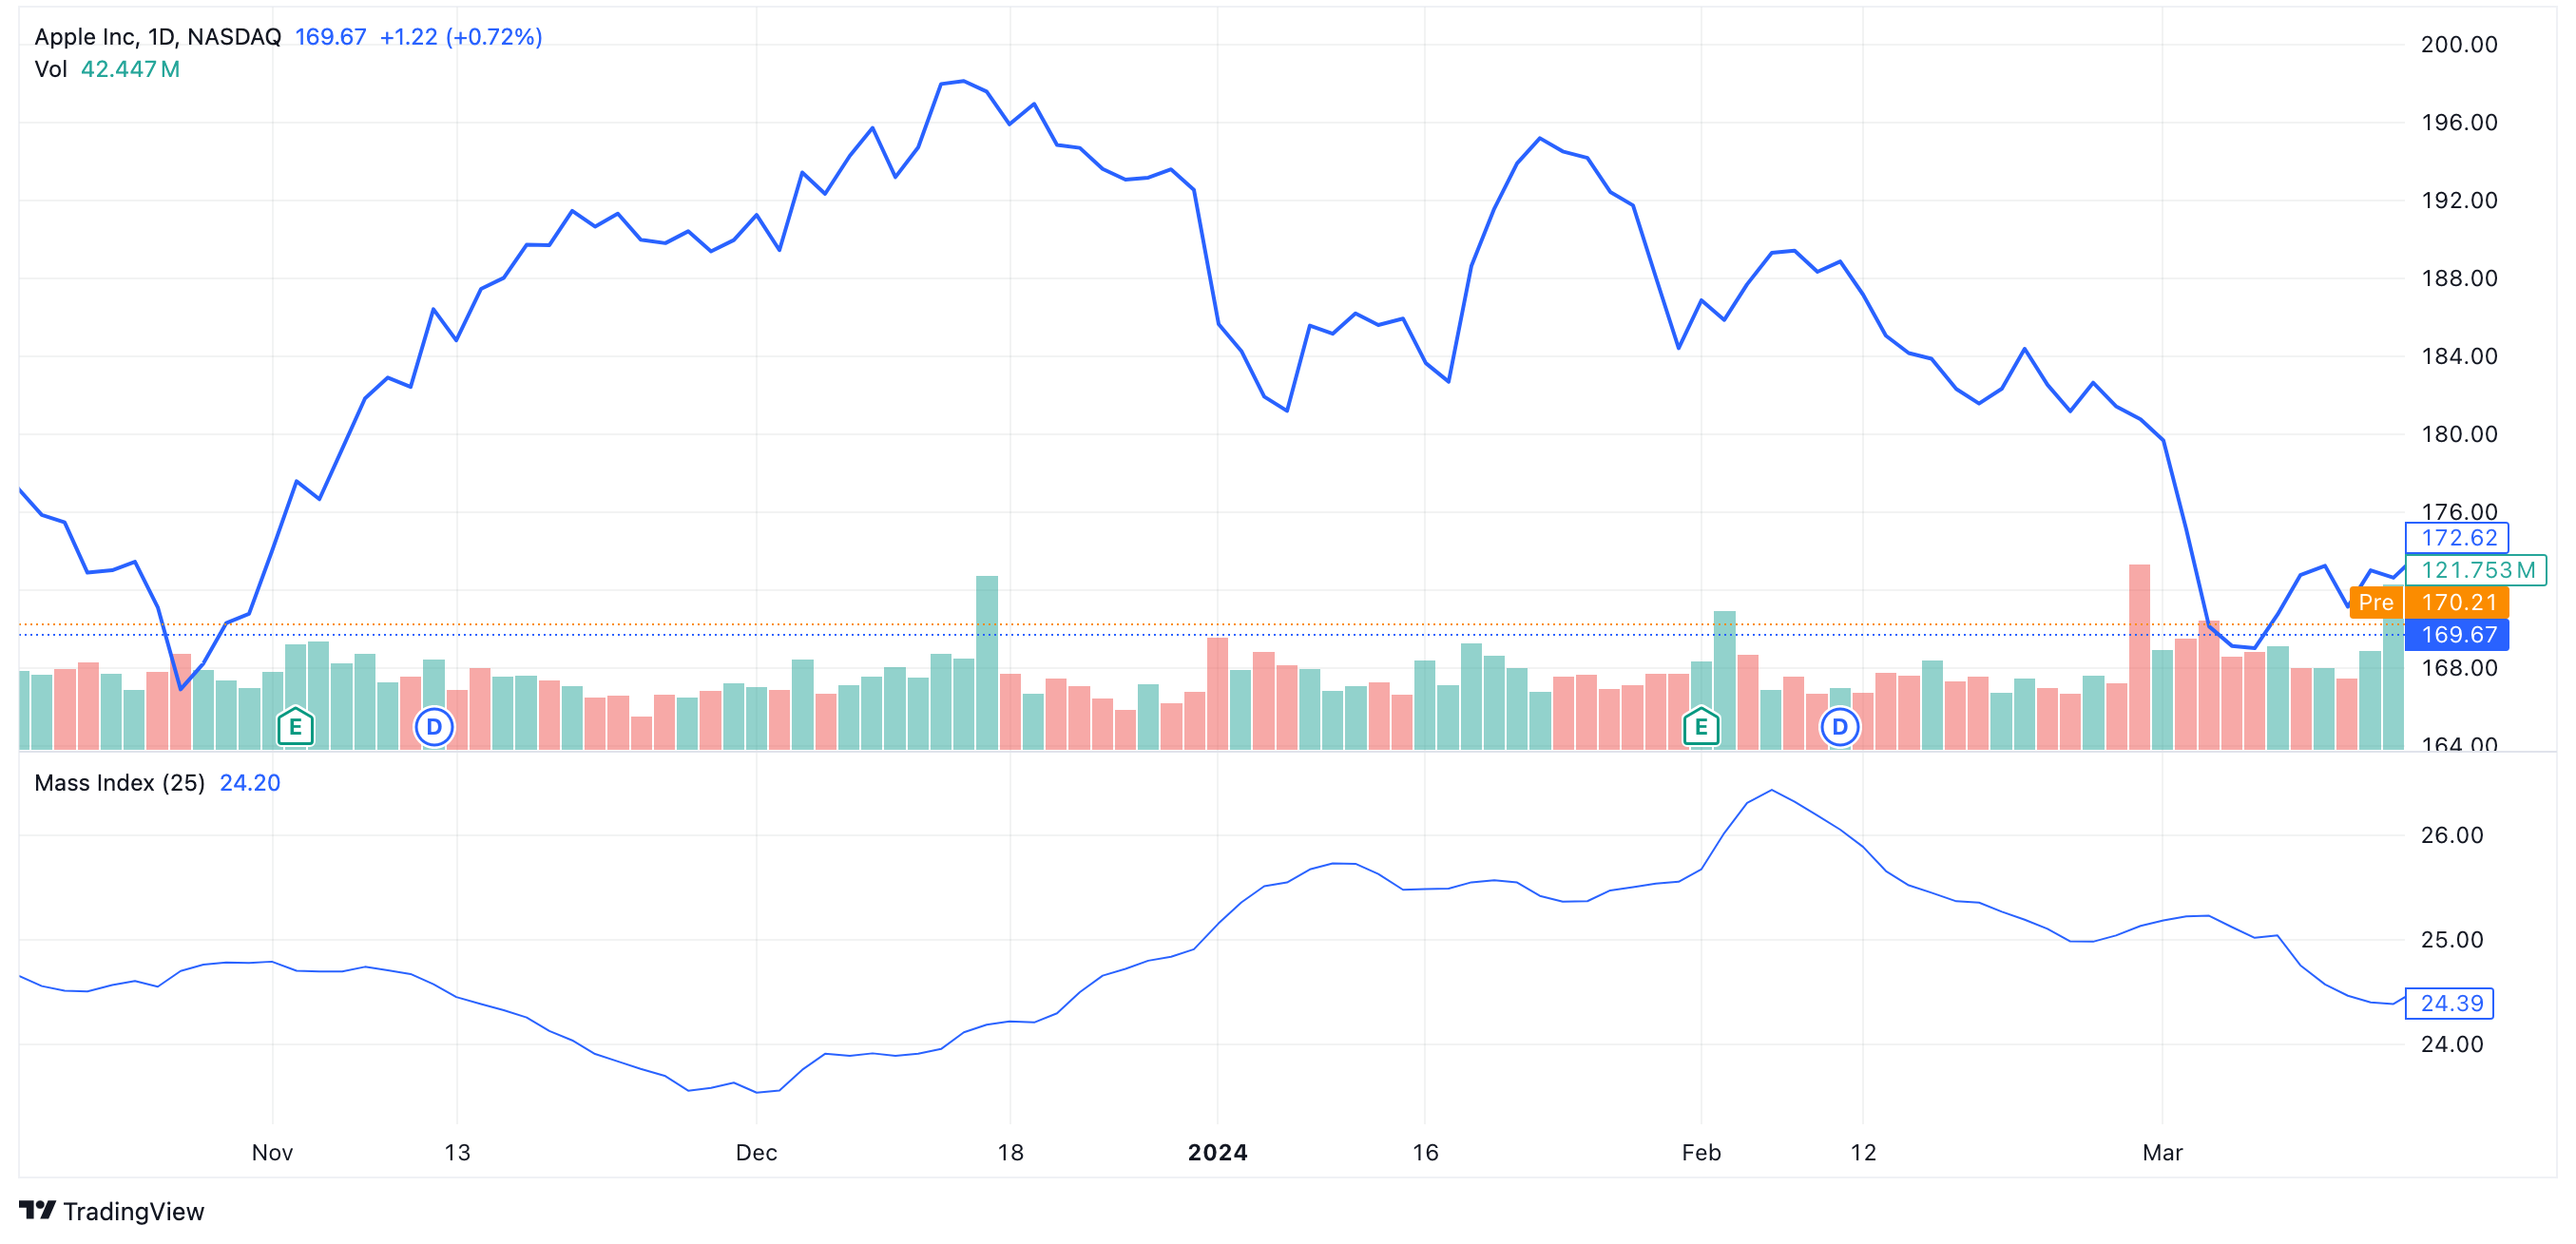

In [ ]:
# Skaiciuojama Mass Index indikatoriaus reiksmes (TESLA duomenims)
data_with_mass_index3 = mass_index(data3)
data_with_mass_index3

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-17  250.100006  257.179993  247.080002  254.850006  254.850006   
2023-10-18  252.699997  254.630005  242.080002  242.679993  242.679993   
2023-10-19  225.949997  230.610001  216.779999  220.110001  220.110001   
2023-10-20  217.009995  218.860001  210.419998  211.990005  211.990005   
2023-10-23  210.000000  216.979996  202.509995  212.080002  212.080002   
...                ...         ...         ...         ...         ...   
2024-03-11  175.449997  182.869995  174.800003  177.770004  177.770004   
2024-03-12  177.770004  179.429993  172.410004  177.539993  177.539993   
2024-03-13  173.050003  176.050003  169.149994  169.479996  169.479996   
2024-03-14  167.770004  171.169998  160.509995  162.500000  162.500000   
2024-03-15  163.160004  165.179993  160.759995  163.570007  163.570007   

               Volume         MI  
Date                              
2023-10-17   93562900        NaN  
2023-10-18  125147800        NaN  
2023-10-19  170772700        NaN  
2023-10-20  137734000        NaN  
2023-10-23  150683400        NaN  
...               ...        ...  
2024-03-11   85391500  25.171818  
2024-03-12   87391700  25.144065  
2024-03-13  106524500  25.067993  
2024-03-14  126325700  25.090191  
2024-03-15   96971900  25.067651  

[104 rows x 7 columns]

In [ ]:
# Istraukiami duomenys (data ir indikatorius), reikalingi grafikams nubraizyti
dates3 = data3.index
mass_index_values3 = data3['MI']

# Grafinis vaizdavimas
plot_stock_analysis(data3, dates3, mass_index_values3, period=25, label='TESLA', indicator_name='Mass Index')

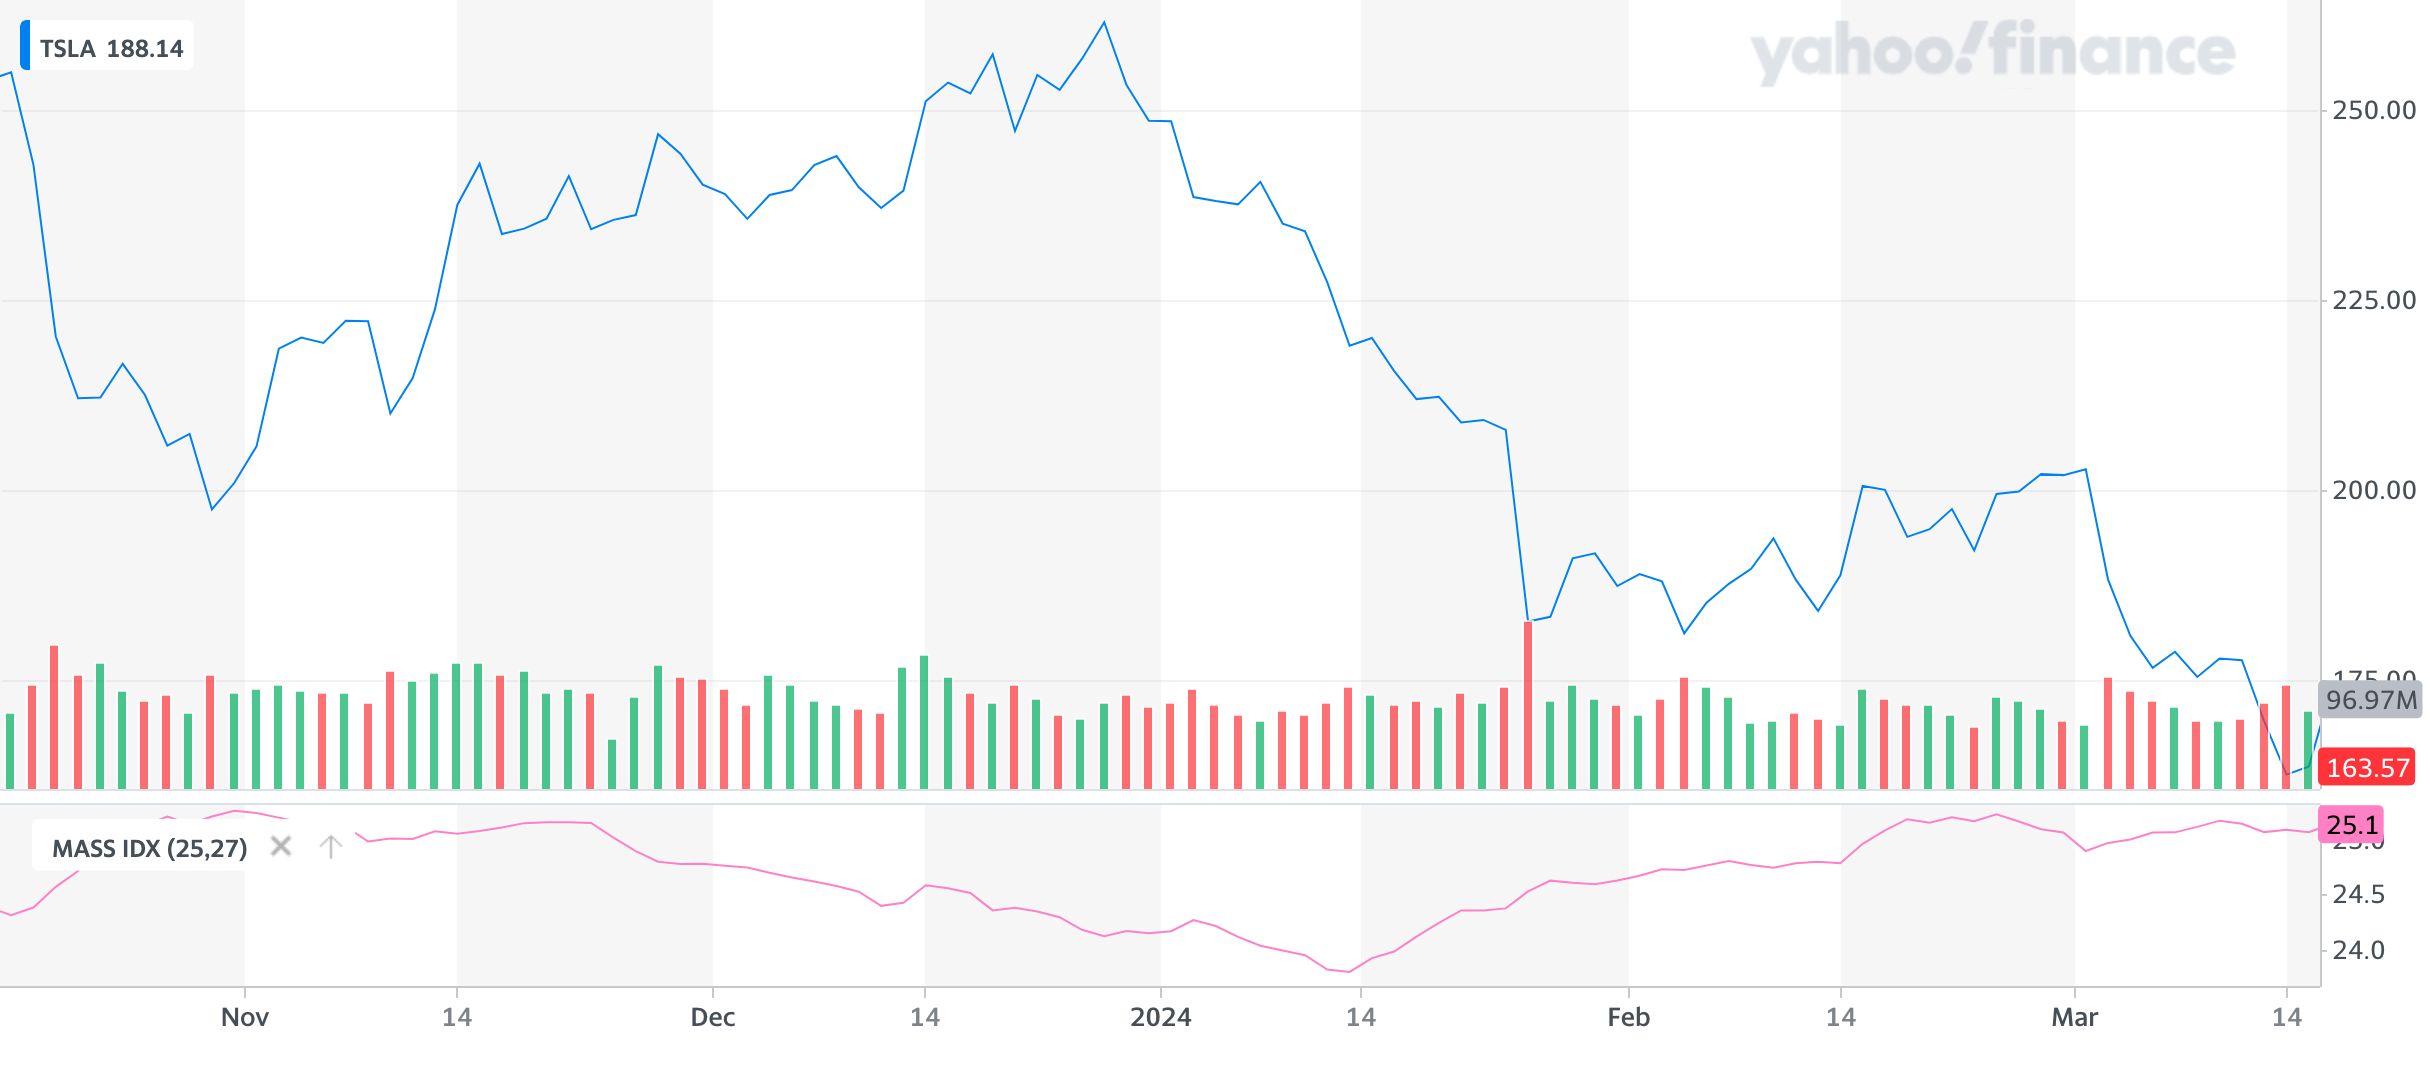

TSLA_MI.png

**Interpretacija:**

nuo spalio mėn. iki gruodžio 18 d. indikatoriaus reikšmės krenta -> kaina kyla -> tikėtina kad kaina kris

# Money Flow Index

*Money Flow Index* indikatorius naudoja tiek kainą, tiek kiekį, pirkimo ir pardavimo poveikiui išmatuoti. MFI vertė svyruoja nuo 0 iki 100.

**Didesnė nei 80 MFI** reikšmė rodo galimą perpirkimą (overbought) -> ženklas **PARDUOTI**

**Mažesnė nei 20 reikšmė** - galimą perpardavimą (oversold) -> ženklas **PIRKTI**

Vienas iš pagrindinių būdų naudoti MFI yra tada, kai yra divergavimas. Divergavimas yra tada, kai osciliatorius juda priešinga kryptimi nei kaina.
Tai signalas apie galimą vyraujančios kainos tendencijos pasikeitimą.

Pavyzdžiui, jei indikatorius kyla, o kaina krenta arba yra vienoda, kaina gali pradėti kilti

MFI602x345.png

**Formulė**

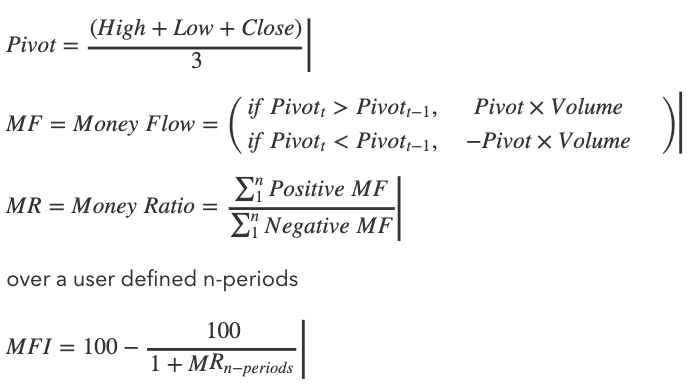



In [ ]:
def money_flow_index(data, period=14, high_col='High', low_col='Low', close_col='Close', volume_col='Volume'):
    # apskaiciuojama tipine kaina - kiekvienos dienos kainos vidurkis
    typical_price = (data[high_col] + data[low_col] + data[close_col]) / 3

    # apskaiciuojamas pinigu srautas - money flow
    money_flow = typical_price * data[volume_col]

    positive_flow = money_flow.where(typical_price > typical_price.shift(1), 0) # teigiamas money flow, kai tipine kaina nuo vieno laikotarpio iki kito dideja
    negative_flow = money_flow.where(typical_price < typical_price.shift(1), 0) # neigiamas  money flow, kai tipine kaina nuo vieno laikotarpio iki kito mazeja

    # Money flow santykis: suma visu dienu, kai money flow teigiama /  suma visu dienu, kai money flow neigiama
    money_flow_ratio = positive_flow.rolling(window=period).sum() / negative_flow.rolling(window=period).sum()

    # skaiciuojamas Money Flow Index indikatorius
    money_flow_index = 100 - (100 / (1 + money_flow_ratio))

    # duomenyse pridedamas naujas stulpelis 'MFI'
    data['MFI'] = money_flow_index

    return data

In [ ]:
def plot_mfi(data, label):
    import matplotlib.pyplot as plt
    import pandas as pd
    import matplotlib.patheffects as pe

    def shade_month_ends(ax, data):
        for year_month, group in data.groupby([data.index.year, data.index.month]):
            year, month = year_month
            next_month_start = pd.Timestamp(year, month, 1) + pd.DateOffset(months=1)
            ax.axvspan(pd.Timestamp(year, month, 15), next_month_start, color='whitesmoke', alpha=0.5)

    plt.style.use("bmh")

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True,
                                   gridspec_kw={'height_ratios': [2, 1]})

    fig.suptitle(f'{label} Close Price and Money Flow Index (MFI)', fontsize=16, y=0.98, fontweight='bold')

    ax1.set_facecolor('white')
    ax2.set_facecolor('white')

    xmin, xmax = data.index.min(), data.index.max()
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.plot(data.index, data['Close'], label=f'{label} Close Price',
             color='royalblue', linewidth=1)

    volume_colors = ['#ff6666' if data['Close'].iloc[i] < data['Close'].iloc[i - 1]
                     else '#66cc66' for i in range(1, len(data))]
    volume_colors.insert(0, '#66cc66')

    vol_height = 0.2 * (ax1.get_ylim()[1] - ax1.get_ylim()[0])
    scaled_volume = data['Volume'] * vol_height / data['Volume'].max()
    ax1.bar(data.index, scaled_volume, width=0.6, bottom=ax1.get_ylim()[0],
            color=volume_colors, alpha=0.7)

    ax1.set_ylabel(f'{label} Close Price')
    ax1.grid(True, linestyle='--', alpha=0.5)

    ax2.plot(data.index, data['MFI'], color='black', linewidth=1.5)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('MFI')
    ax2.set_xlabel('Date')

    for y in [20, 80]:
        ax2.axhline(y=y, color='gray', linestyle='-', alpha=0.3)

    ax2.fill_between(data.index, data['MFI'], 20, where=(data['MFI'] < 20),
                 color='gray', alpha=0.3)


    ax2.grid(True, linestyle='--', alpha=0.5)

    y_ticks_fontsize = 10

    if not data.empty:
        last_price = data['Close'].iloc[-1]
        ax1.text(1.035, last_price, f'{last_price:.2f}', transform=ax1.get_yaxis_transform(),
                 ha='right', va='center', fontsize=y_ticks_fontsize, color='white',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.7))

        last_indicator_value = data['MFI'].iloc[-1]
        text = ax2.text(1.015, last_indicator_value, f'{last_indicator_value:.0f}',
                        transform=ax2.get_yaxis_transform(), ha='right', va='center',
                        fontsize=y_ticks_fontsize, color='white',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.6))
        text.set_path_effects([pe.withStroke(linewidth=1, foreground='white')])

    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

    shade_month_ends(ax1, data)
    shade_month_ends(ax2, data)

    plt.tight_layout()
    plt.show()

In [ ]:
# Money Flow Index (MFI) indeksas (AAPL duomenims)
data = money_flow_index(data)
print(data)

# Grafinis atvaizdavimas (AAPL duomenims)
plot_mfi(data, label='AAPL')

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-17  176.649994  178.419998  174.800003  177.149994  176.691452   
2023-10-18  175.580002  177.580002  175.110001  175.839996  175.384842   
2023-10-19  176.039993  177.839996  175.190002  175.460007  175.005844   
2023-10-20  175.309998  175.419998  172.639999  172.880005  172.432510   
2023-10-23  170.910004  174.009995  169.929993  173.000000  172.552200   
...                ...         ...         ...         ...         ...   
2024-03-11  172.940002  174.380005  172.050003  172.750000  172.750000   
2024-03-12  173.149994  174.029999  171.009995  173.229996  173.229996   
2024-03-13  172.770004  173.190002  170.759995  171.130005  171.130005   
2024-03-14  172.910004  174.309998  172.050003  173.000000  173.000000   
2024-03-15  171.169998  172.619995  170.289993  172.619995  172.619995   

               Volume         MI     

# 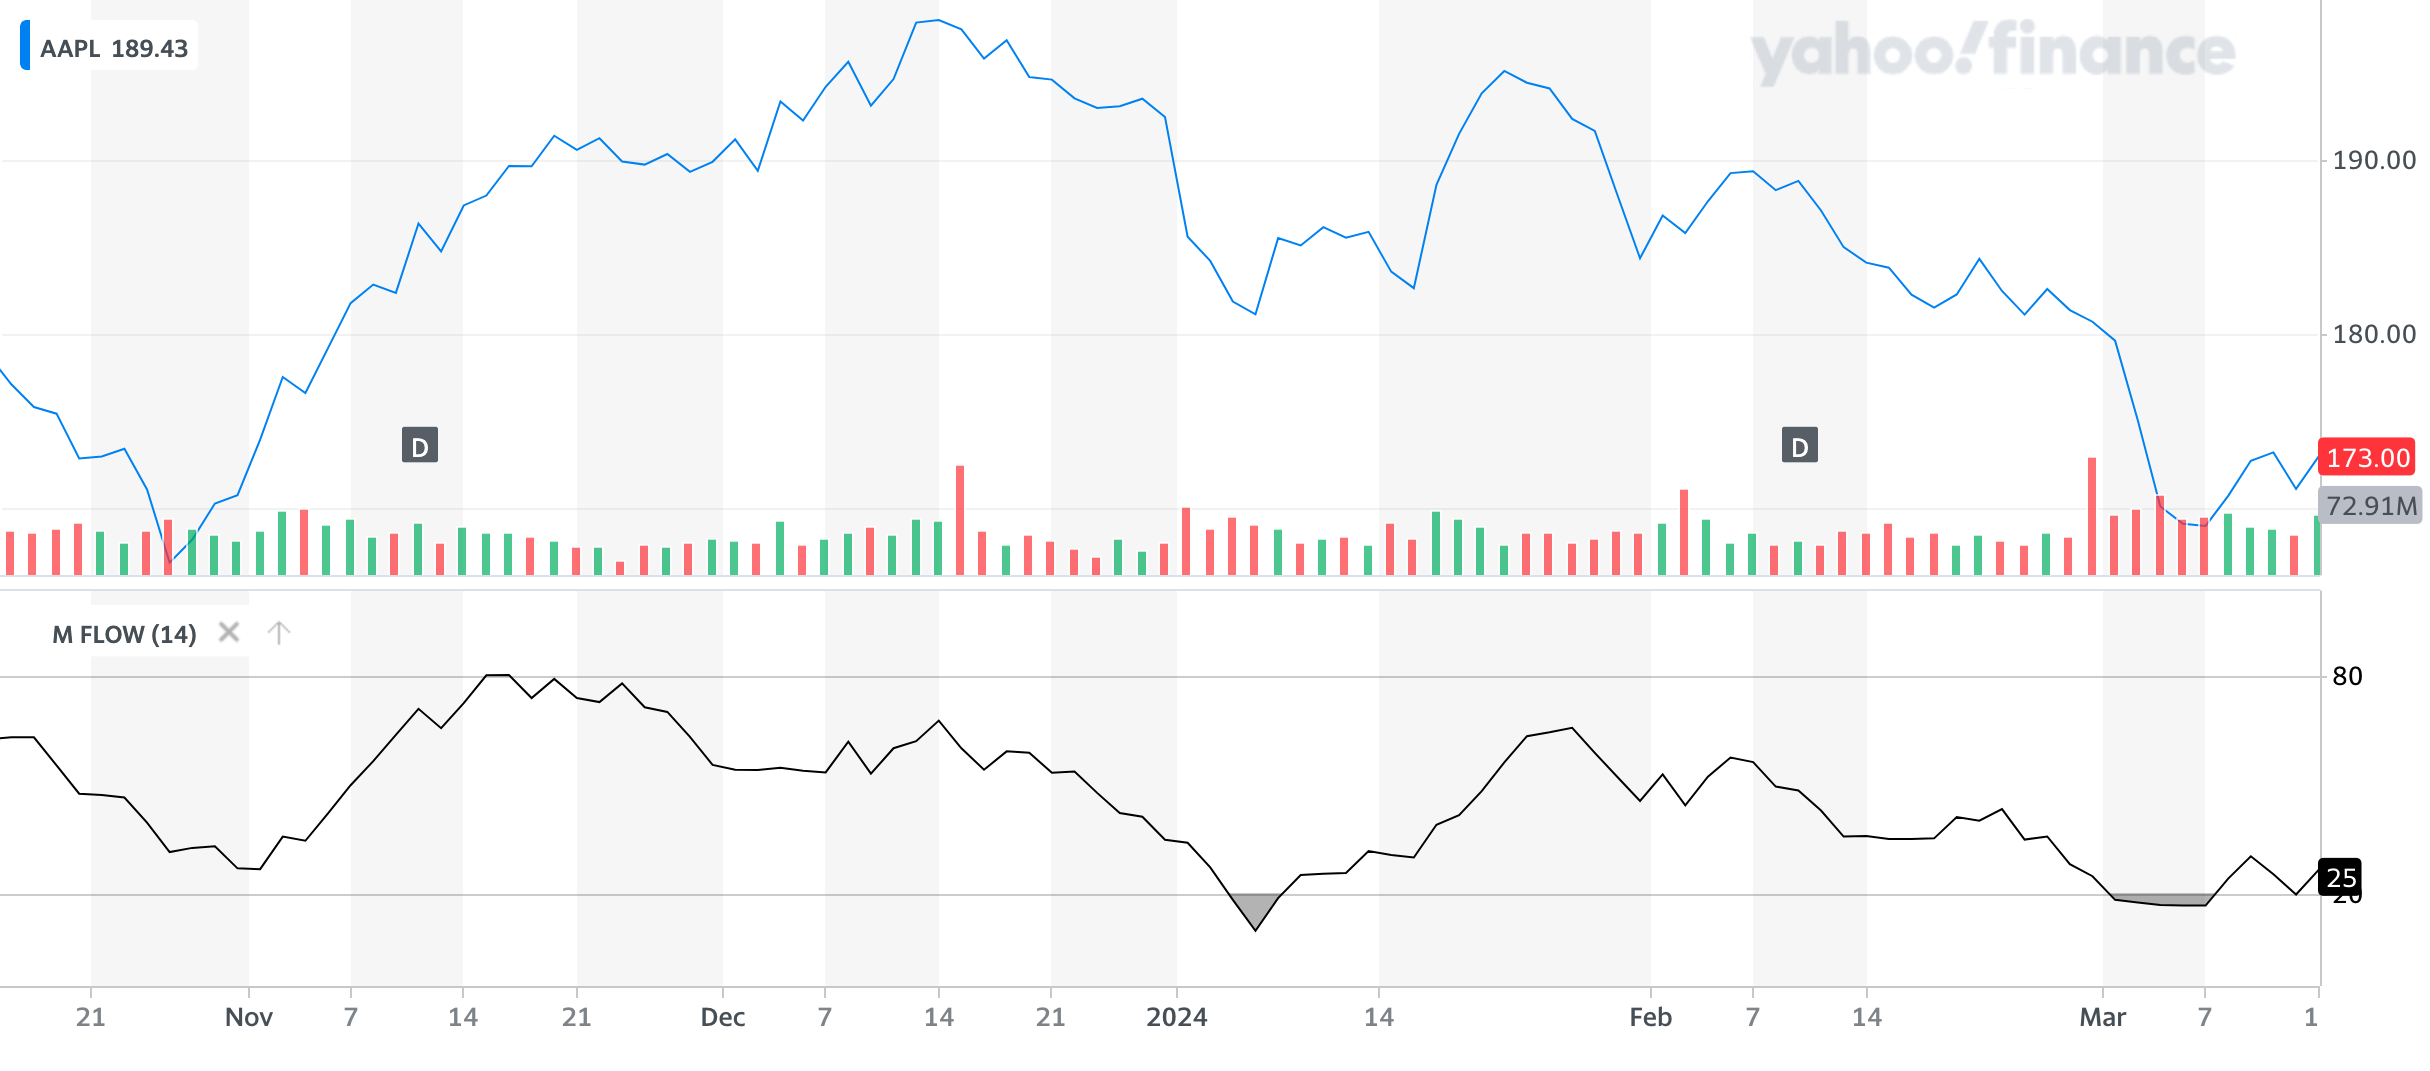

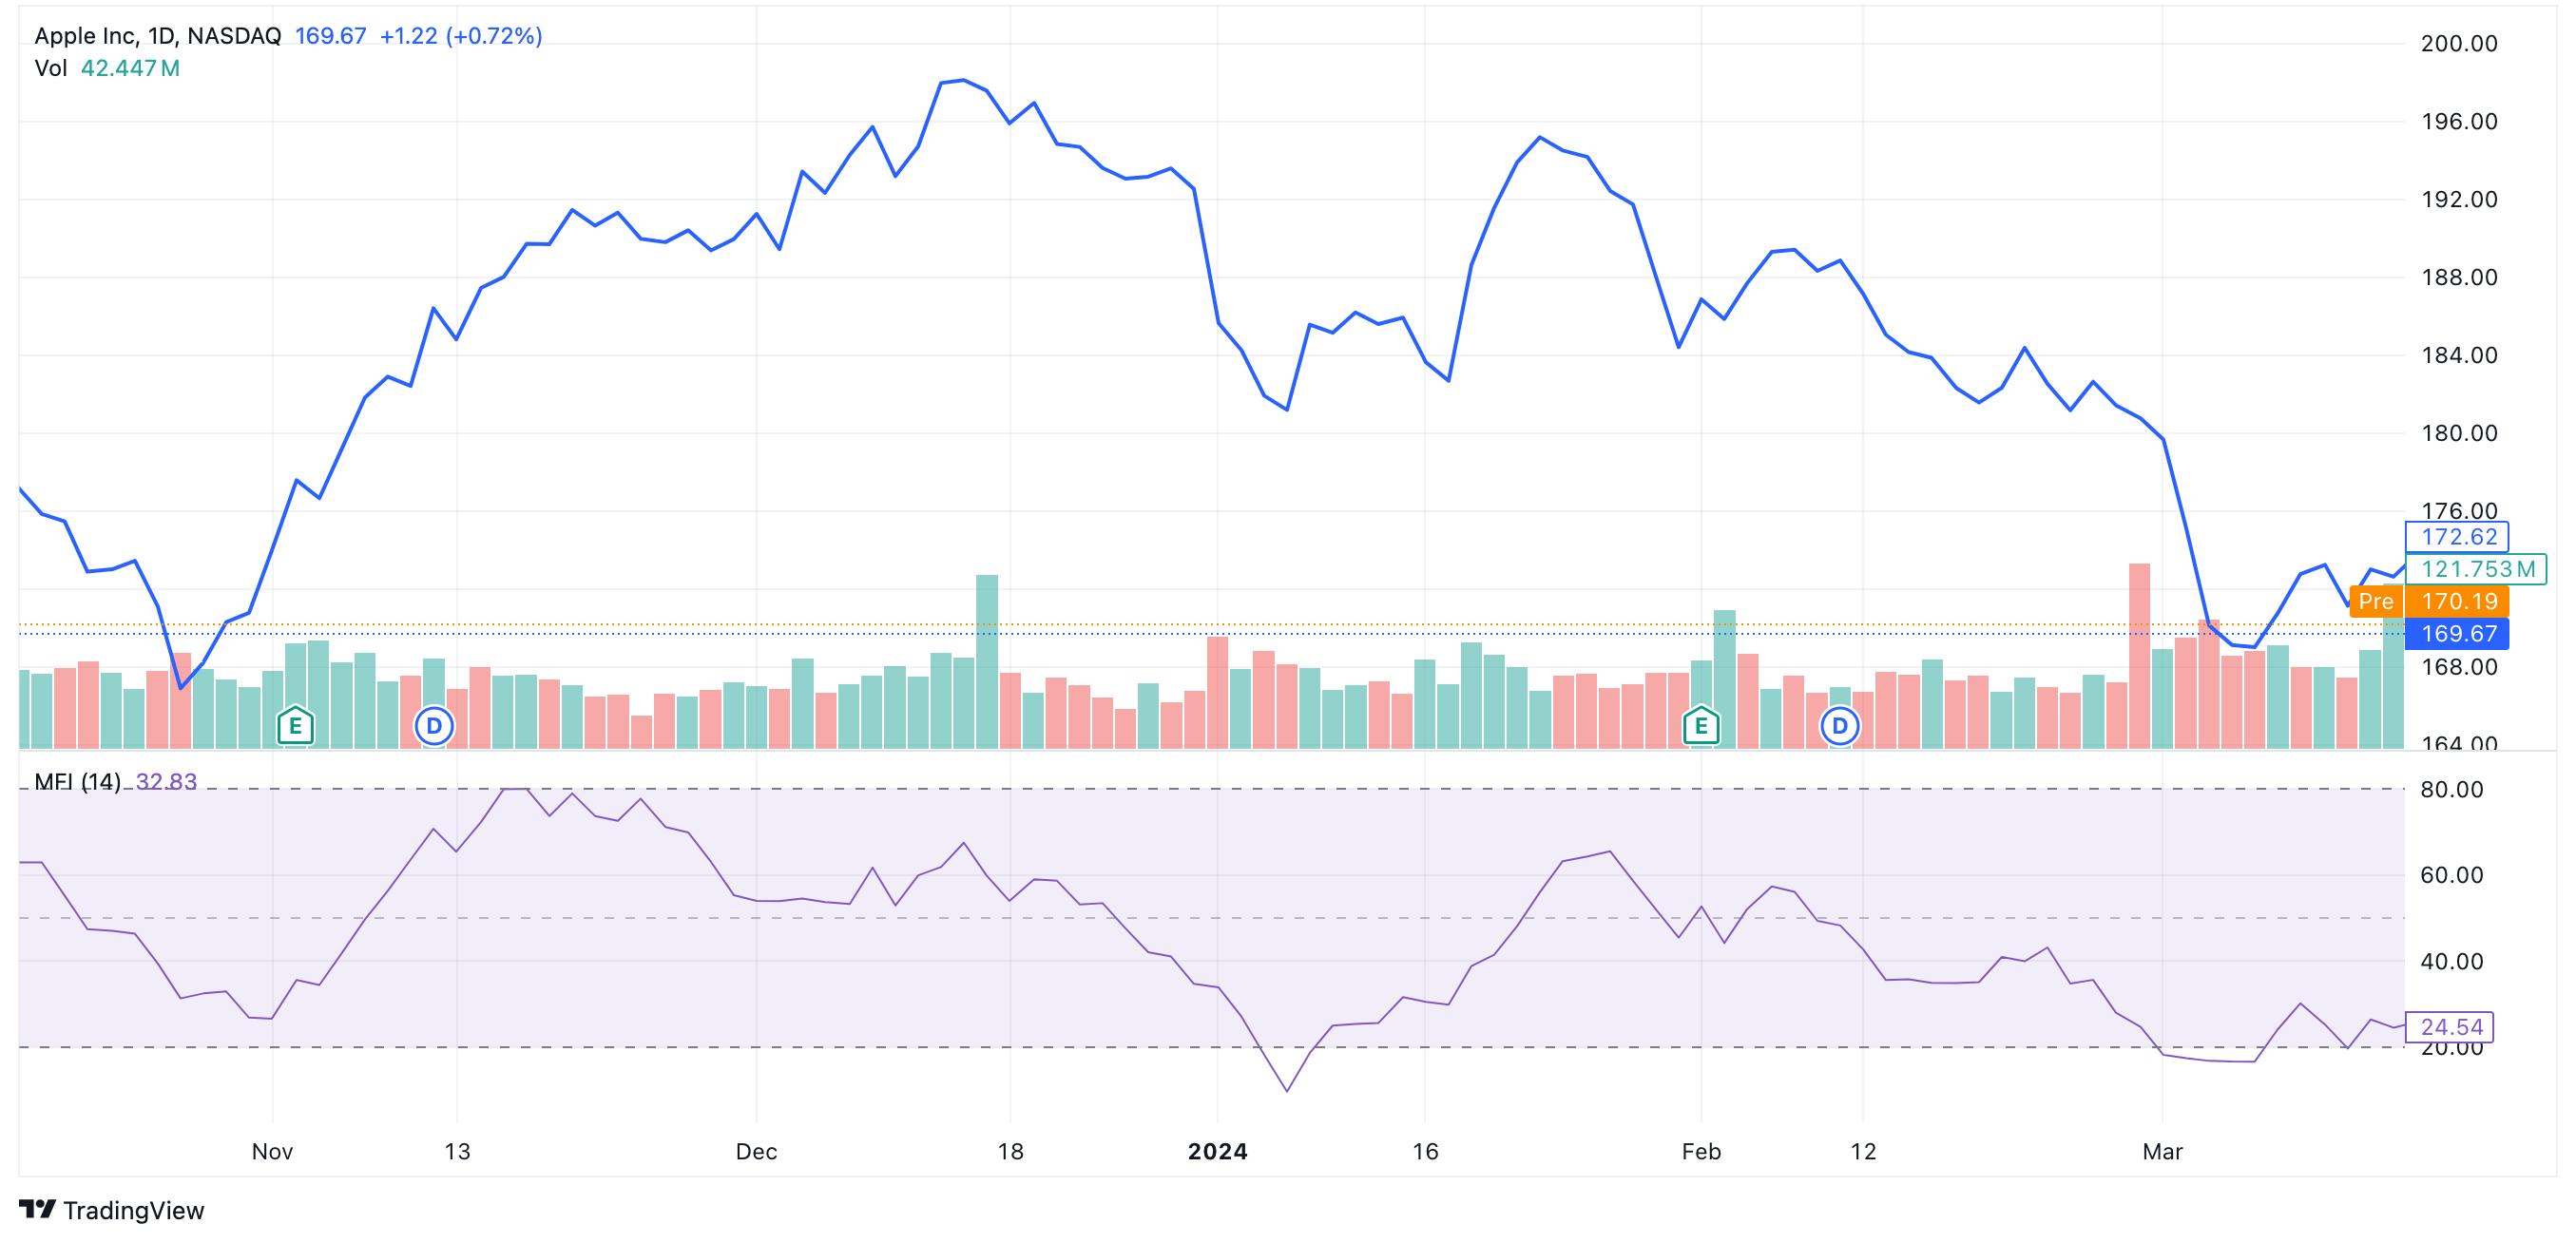

**Interpretacija**

AAPL:

nuo 2024 m. sausio 5 d. iki vasario 7 d. mažesnė nei 20 reikšmė - galimas perpardavimas (oversold) -> ženklas pirkti

nuo 2024 m. kovo 1 d. iki kovo 7 d. mažesnė nei 20 reikšmė - galimas perpardavimas (oversold) -> ženklas pirkti

nuo 2023 m. lapkričio 14 d. iki gruodžio 14 d.: indikatorius krenta, o kaina kyla -> galimas kainos kritimas


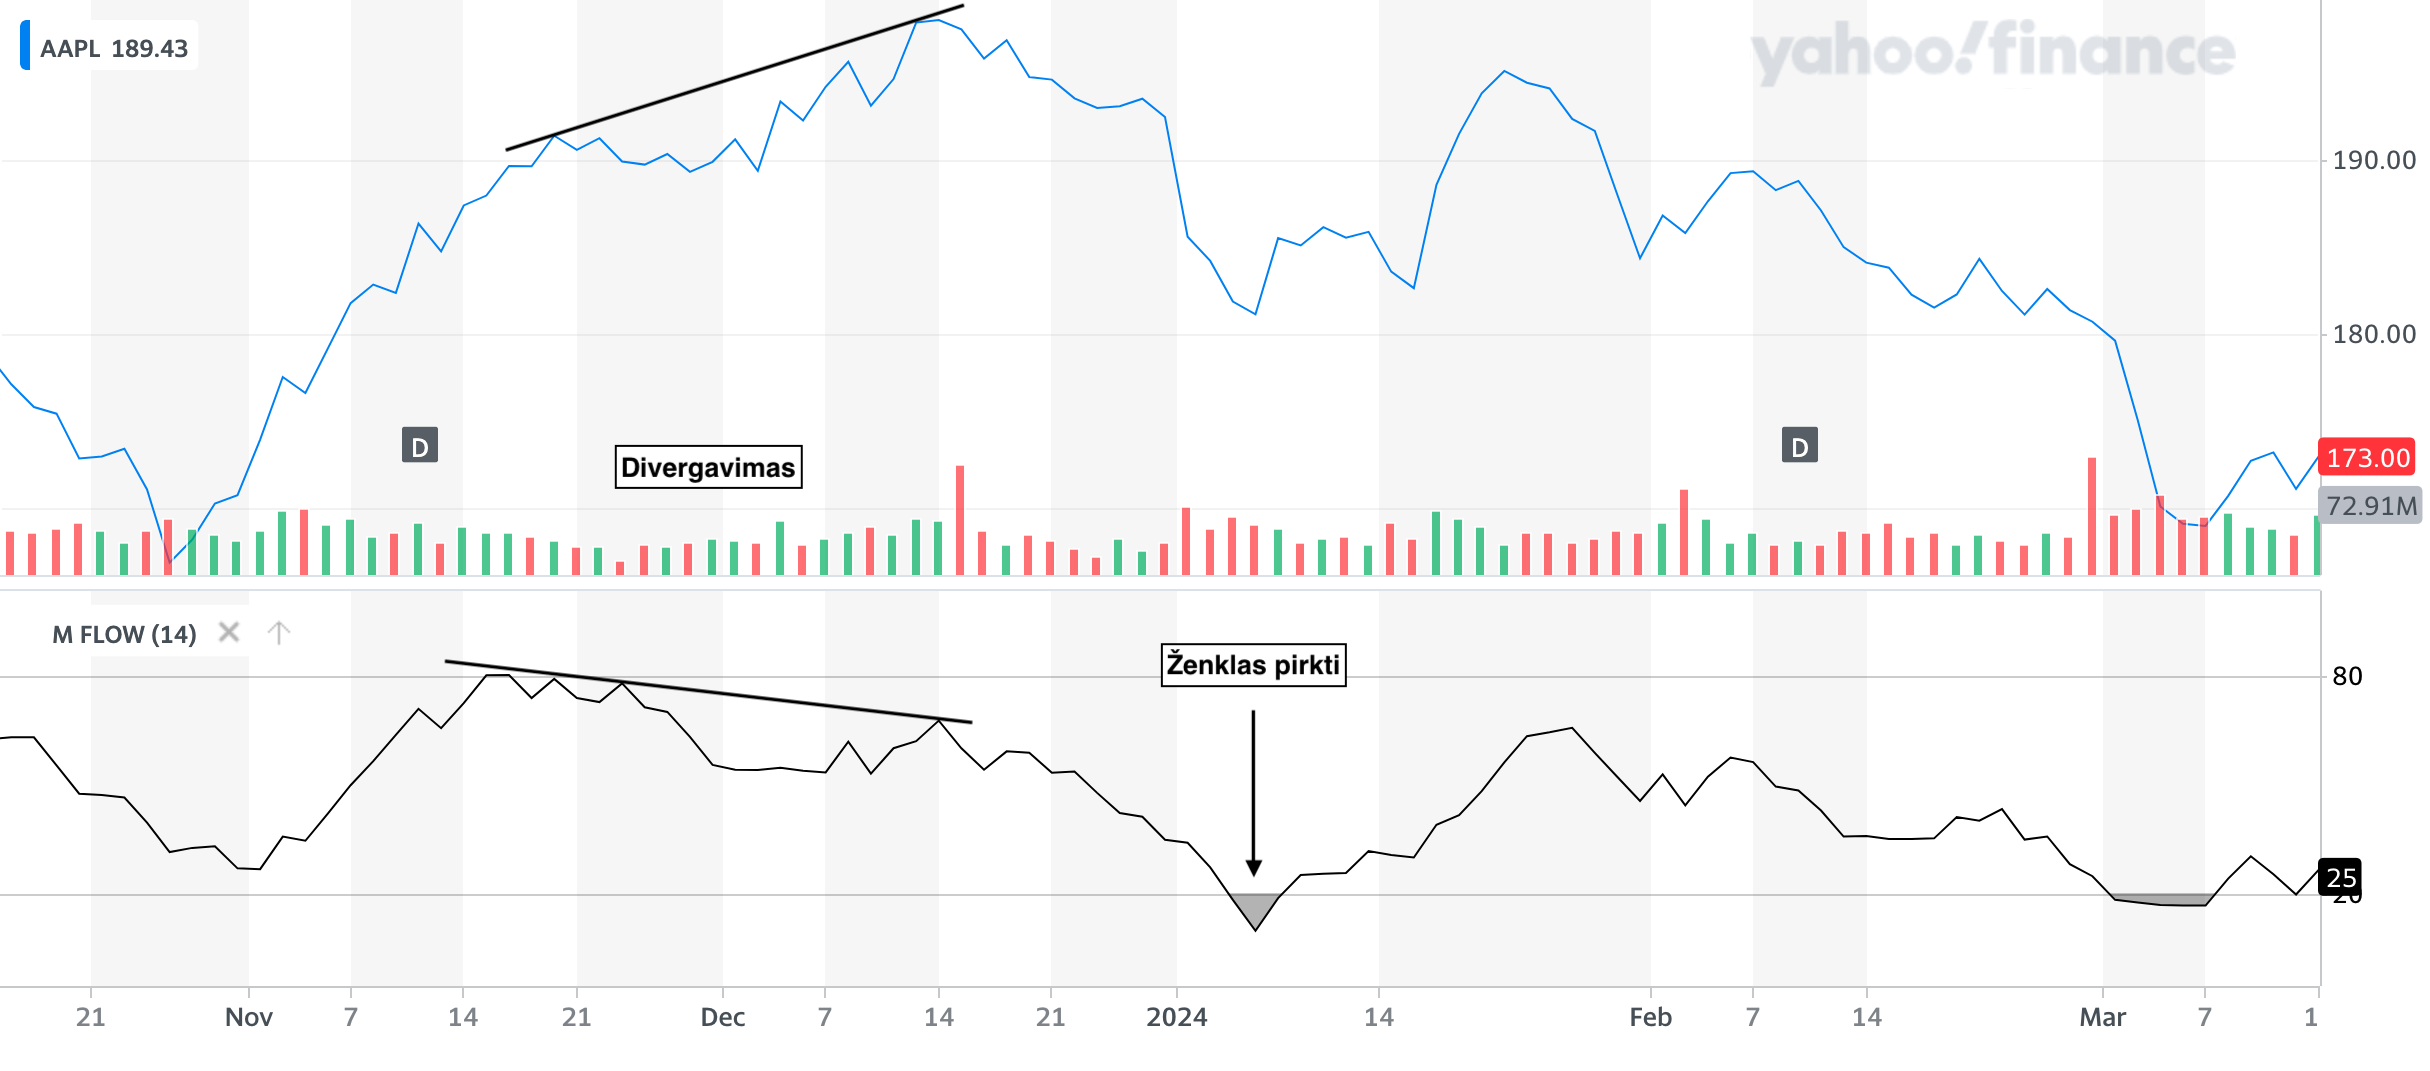

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-17  250.100006  257.179993  247.080002  254.850006  254.850006   
2023-10-18  252.699997  254.630005  242.080002  242.679993  242.679993   
2023-10-19  225.949997  230.610001  216.779999  220.110001  220.110001   
2023-10-20  217.009995  218.860001  210.419998  211.990005  211.990005   
2023-10-23  210.000000  216.979996  202.509995  212.080002  212.080002   
...                ...         ...         ...         ...         ...   
2024-03-11  175.449997  182.869995  174.800003  177.770004  177.770004   
2024-03-12  177.770004  179.429993  172.410004  177.539993  177.539993   
2024-03-13  173.050003  176.050003  169.149994  169.479996  169.479996   
2024-03-14  167.770004  171.169998  160.509995  162.500000  162.500000   
2024-03-15  163.160004  165.179993  160.759995  163.570007  163.570007   

               Volume         MI     

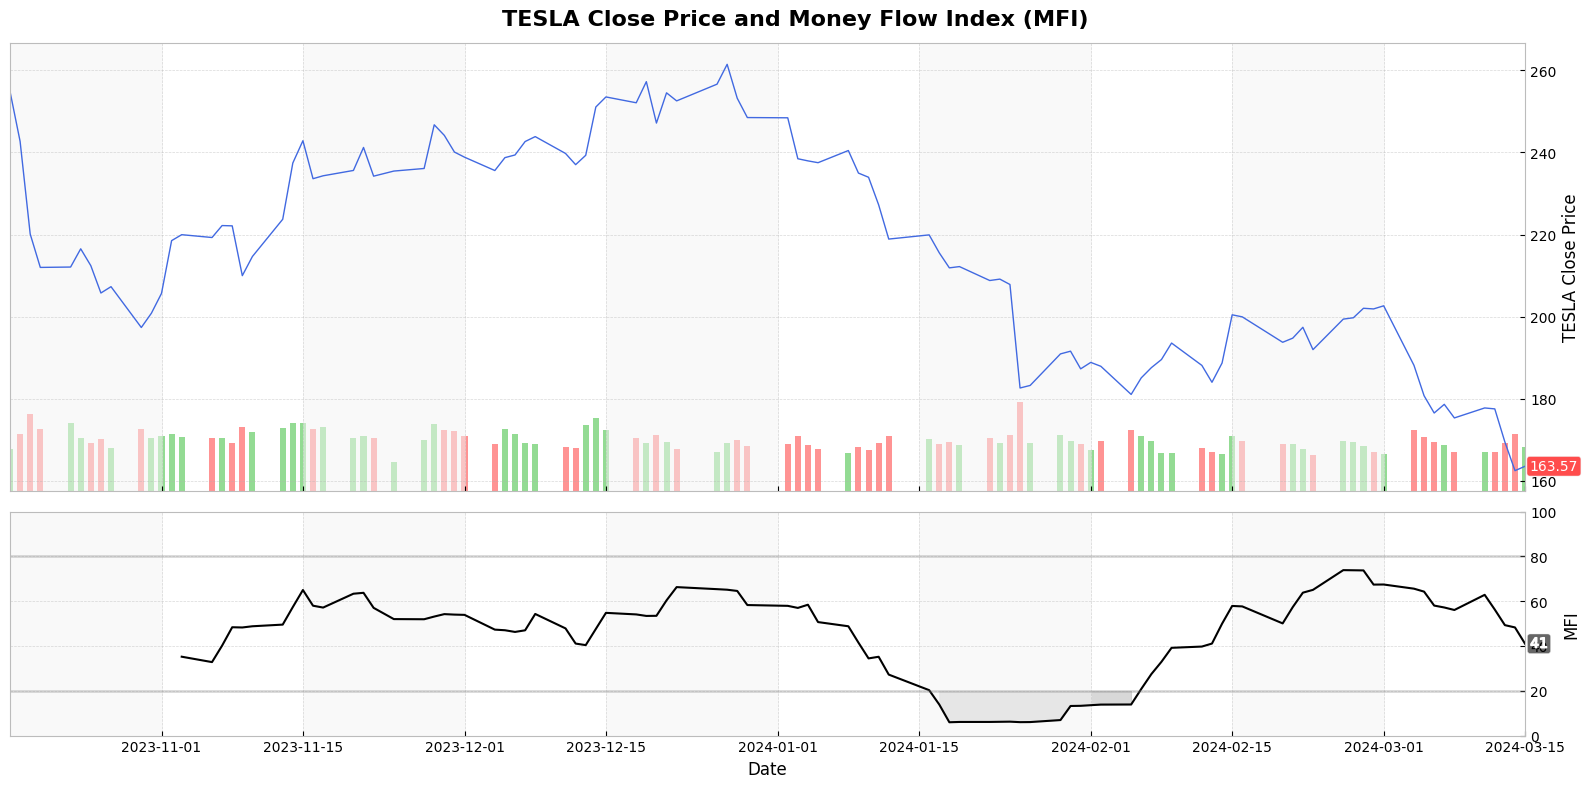

In [ ]:
# Money Flow Index (MFI) indeksas (TESLA duomenims)
data3 = money_flow_index(data3)
print(data3)

# Grafinis atvaizdavimas (TESLA duomenims)
plot_mfi(data3, label='TESLA')

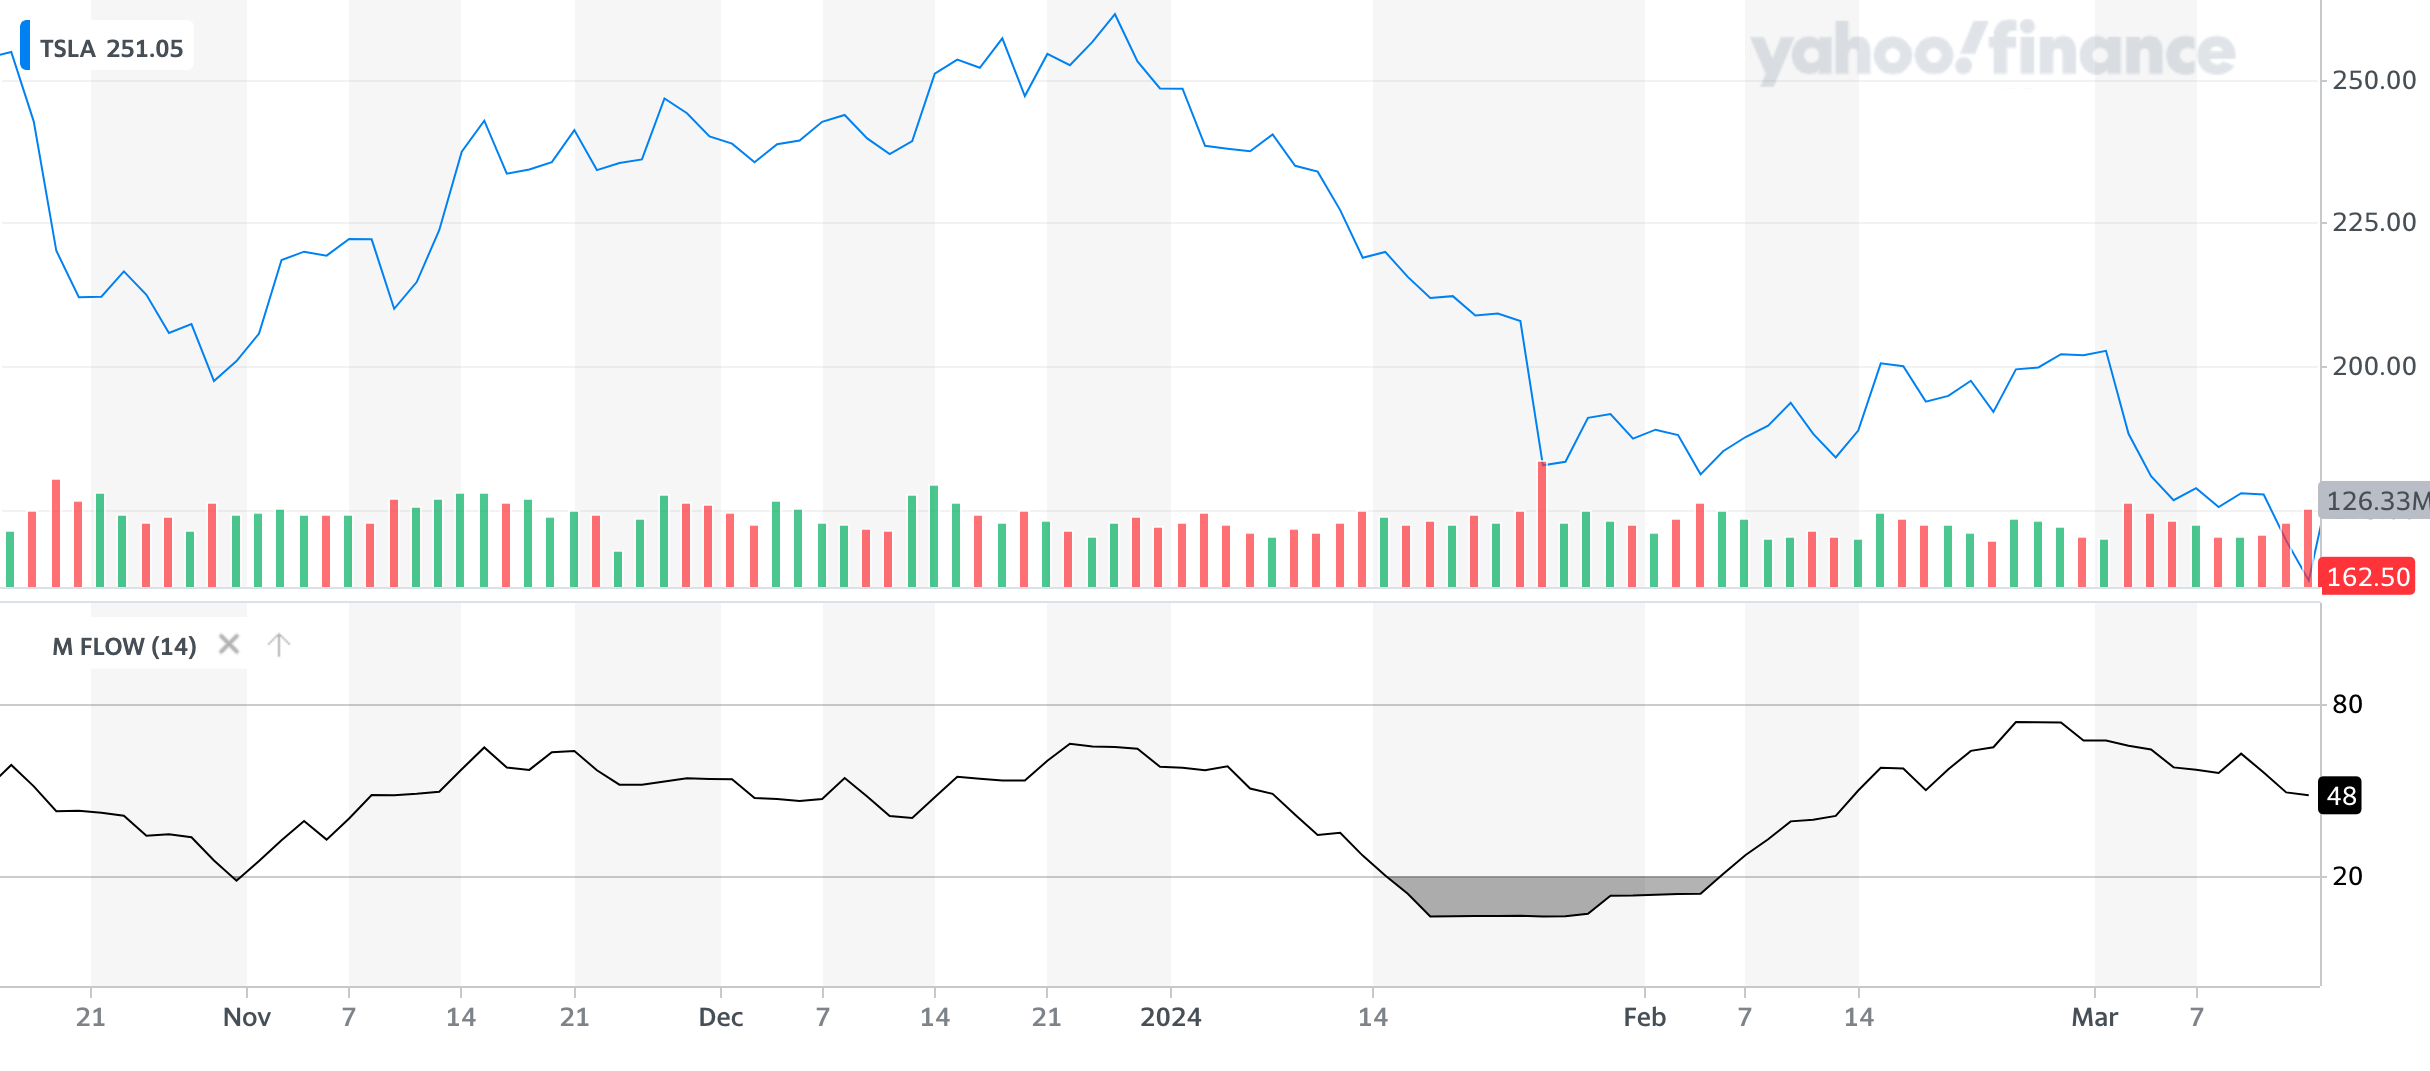

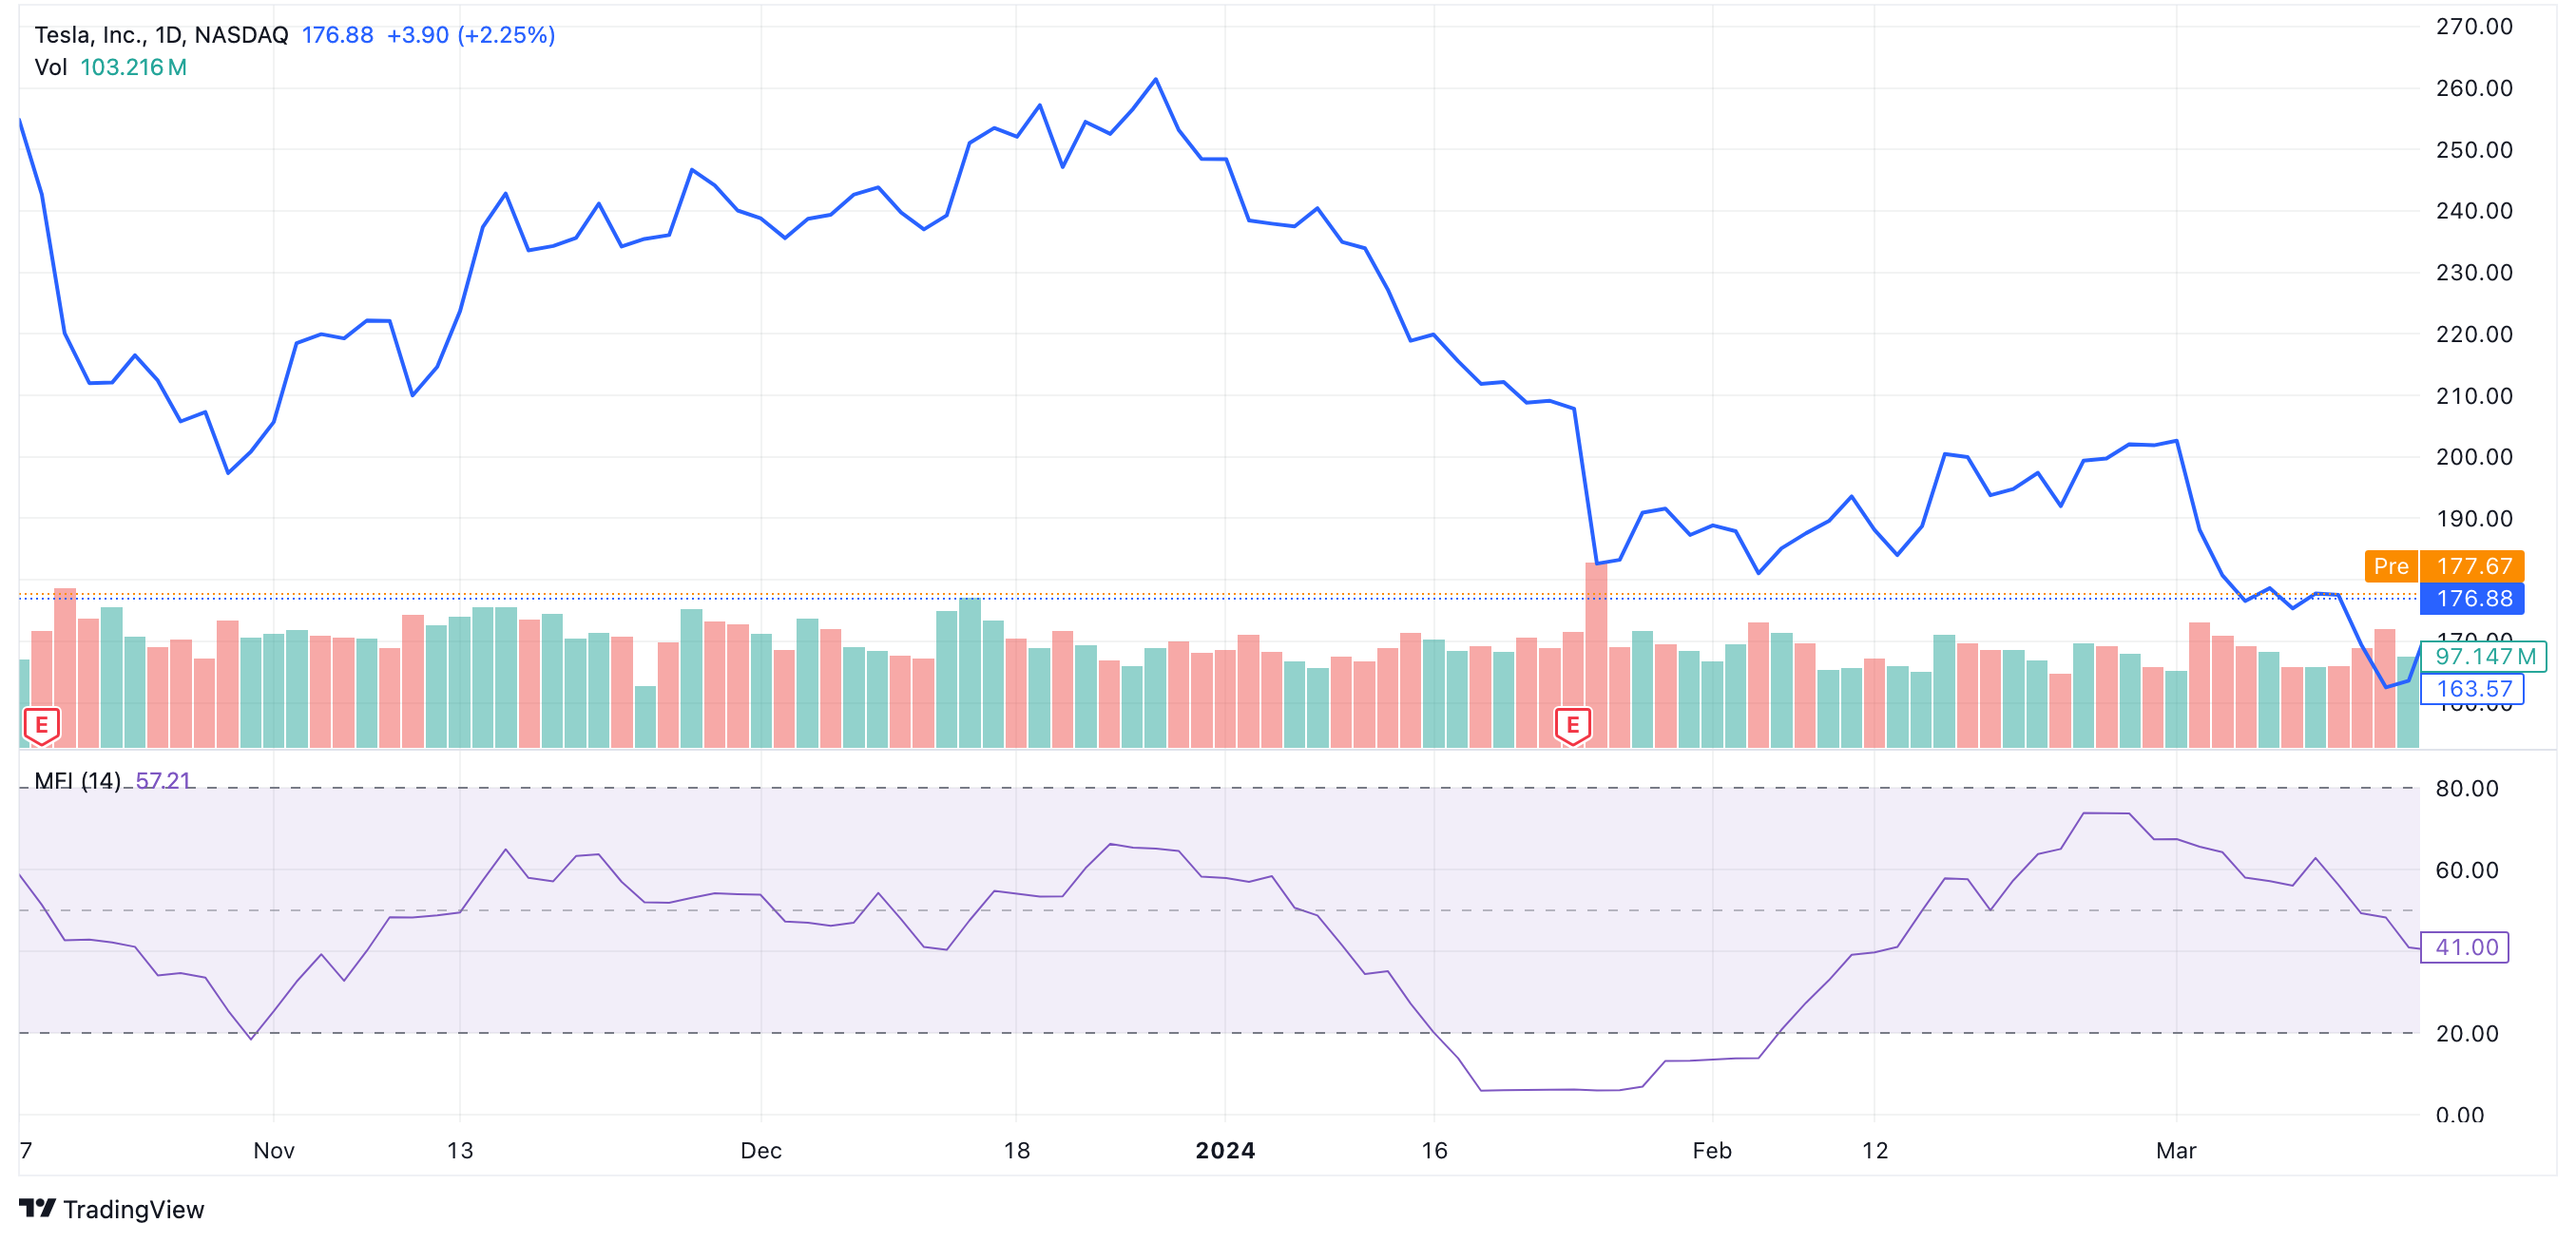

**Interpretacija**

TESLA:

nuo 2024 m. sausio 14 d. iki vasario 5 d. mažesnė nei 20 reikšmė - galimą perpardavimą (oversold) -> ženklas pirkti

nuo 2023 m. lapkričio mėn. vidurio iki gruodžio mėn. vidurio: indikatorius krenta, o kaina kyla -> galimas kainos kritimas

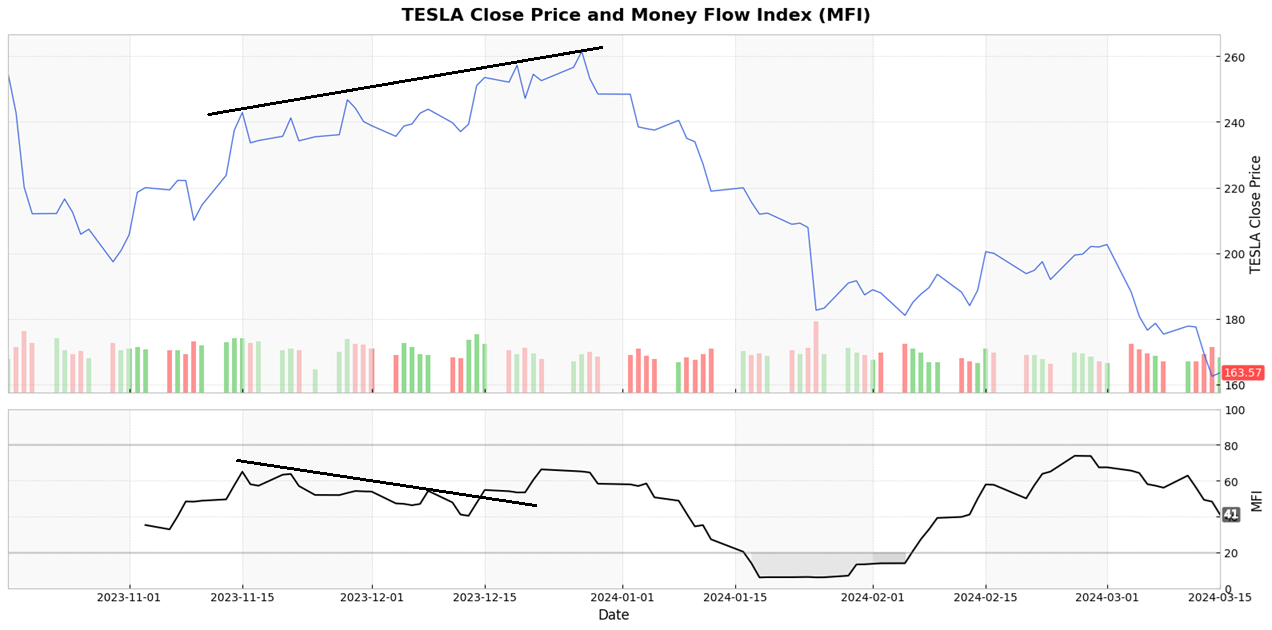